### Setup

In [343]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency


import importlib
import utils
# Cache-Probleme umgehen
importlib.reload(utils)

from utils import hex_to_rgb_normalized
from utils import categorize_skewness
from utils import shapiro_wilk_test
from utils import find_similar_rows

In [352]:
# Farben für Diagramme
color1 = '#9794E4' # Helllila
color2 = '#120D95' # Dunkelblau
color3 = '#5F0607' # Dunkelrot
color4 = '#3E0E4B' # Lila
color5 = '#D5E1F8' # Hellblau

### Data load

In [32]:
df_test = pd.read_csv('../data/raw/triathlon_watch_test_data_final.csv')
df_training = pd.read_csv('../data/raw/triathlon_watch_training_data_final.csv')

### First Look Data

In [33]:
df_training.head()

,ID,Age of customer,Sex,Ctry,Town,Swimming Hours per Week,Biking Hours per Week,Running Hours per Week,Total Training Hours per Week,VO2 Max,...,Calories Burned per Week,Support Cases of Customer,Customer Years,Most current software update,Goal of Training,Preferred Training Daytime,Subscription Type,Color of Watch,Synchronisation,User of latest model
0,C0001,61.0,Other,UK,Birmingham,2.52,0.10,1.78,4.40,23.08,...,2329.95,2.0,1.0,2024-07-22,Fitness,Evening,Free,White,Yes,1.0
1,C0003,57.0,Other,Australia,Sydney,1.55,10.01,4.57,16.13,39.04,...,7904.93,2.0,1.0,2024-05-11,Fitness,Evening,Premium,Black,Yes,0.0
2,C0004,30.0,Other,India,Bangalore,1.19,12.04,8.64,21.87,71.59,...,10839.81,2.0,0.0,2024-08-16,Competition,Afternoon,Free,White,Yes,1.0
3,C0005,21.0,Male,Germany,Munich,2.25,4.67,0.92,7.84,49.09,...,NaN,3.0,0.0,2024-08-11,Recreation,Evening,Premium,Black,No,1.0
4,C0006,63.0,Male,India,Mumbai,0.80,5.88,0.67,7.35,13.91,...,3575.96,3.0,3.0,2024-11-18,Recreation,Morning,Basic,Black,Yes,0.0


In [34]:
df_training.tail()

,ID,Age of customer,Sex,Ctry,Town,Swimming Hours per Week,Biking Hours per Week,Running Hours per Week,Total Training Hours per Week,VO2 Max,...,Calories Burned per Week,Support Cases of Customer,Customer Years,Most current software update,Goal of Training,Preferred Training Daytime,Subscription Type,Color of Watch,Synchronisation,User of latest model
995,C0996,28.0,Female,Australia,Brisbane,2.38,0.28,2.79,5.46,61.05,...,2589.77,0.0,3.0,2024-01-09,Recreation,Morning,Premium,Black,Yes,0.0
996,C0997,54.0,Female,Australia,Melbourne,1.80,4.45,1.35,7.61,34.50,...,4104.15,0.0,3.0,2024-11-09,Recreation,Afternoon,Free,Black,Yes,0.0
997,C0998,35.0,Other,USA,New York,3.91,0.57,5.57,10.05,58.63,...,5078.45,4.0,6.0,2024-08-27,Fitness,Afternoon,Premium,Black,Yes,1.0
998,C0999,31.0,Other,Germayn,Berlin,0.36,4.63,5.16,10.15,66.46,...,5184.27,3.0,3.0,2024-06-19,Fitness,Evening,Free,Black,NaN,1.0
999,C1000,27.0,Male,India,Mumbai,0.43,7.46,5.55,13.44,61.81,...,6827.69,0.0,7.0,2024-06-04,Fitness,Afternoon,Premium,Black,Yes,0.0


In [35]:
df_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             978 non-null    object 
 1   Age of customer                978 non-null    float64
 2   Sex                            978 non-null    object 
 3   Ctry                           978 non-null    object 
 4   Town                           939 non-null    object 
 5   Swimming Hours per Week        978 non-null    float64
 6   Biking Hours per Week          954 non-null    float64
 7   Running Hours per Week         978 non-null    float64
 8   Total Training Hours per Week  978 non-null    float64
 9   VO2 Max                        975 non-null    float64
 10  10k Running Time Prediction    978 non-null    float64
 11  Calories Burned per Week       959 non-null    float64
 12  Support Cases of Customer      978 non-null    fl

In [36]:
df_training.shape

(1000, 21)

### Missing/Unplausible Values

<Axes: >

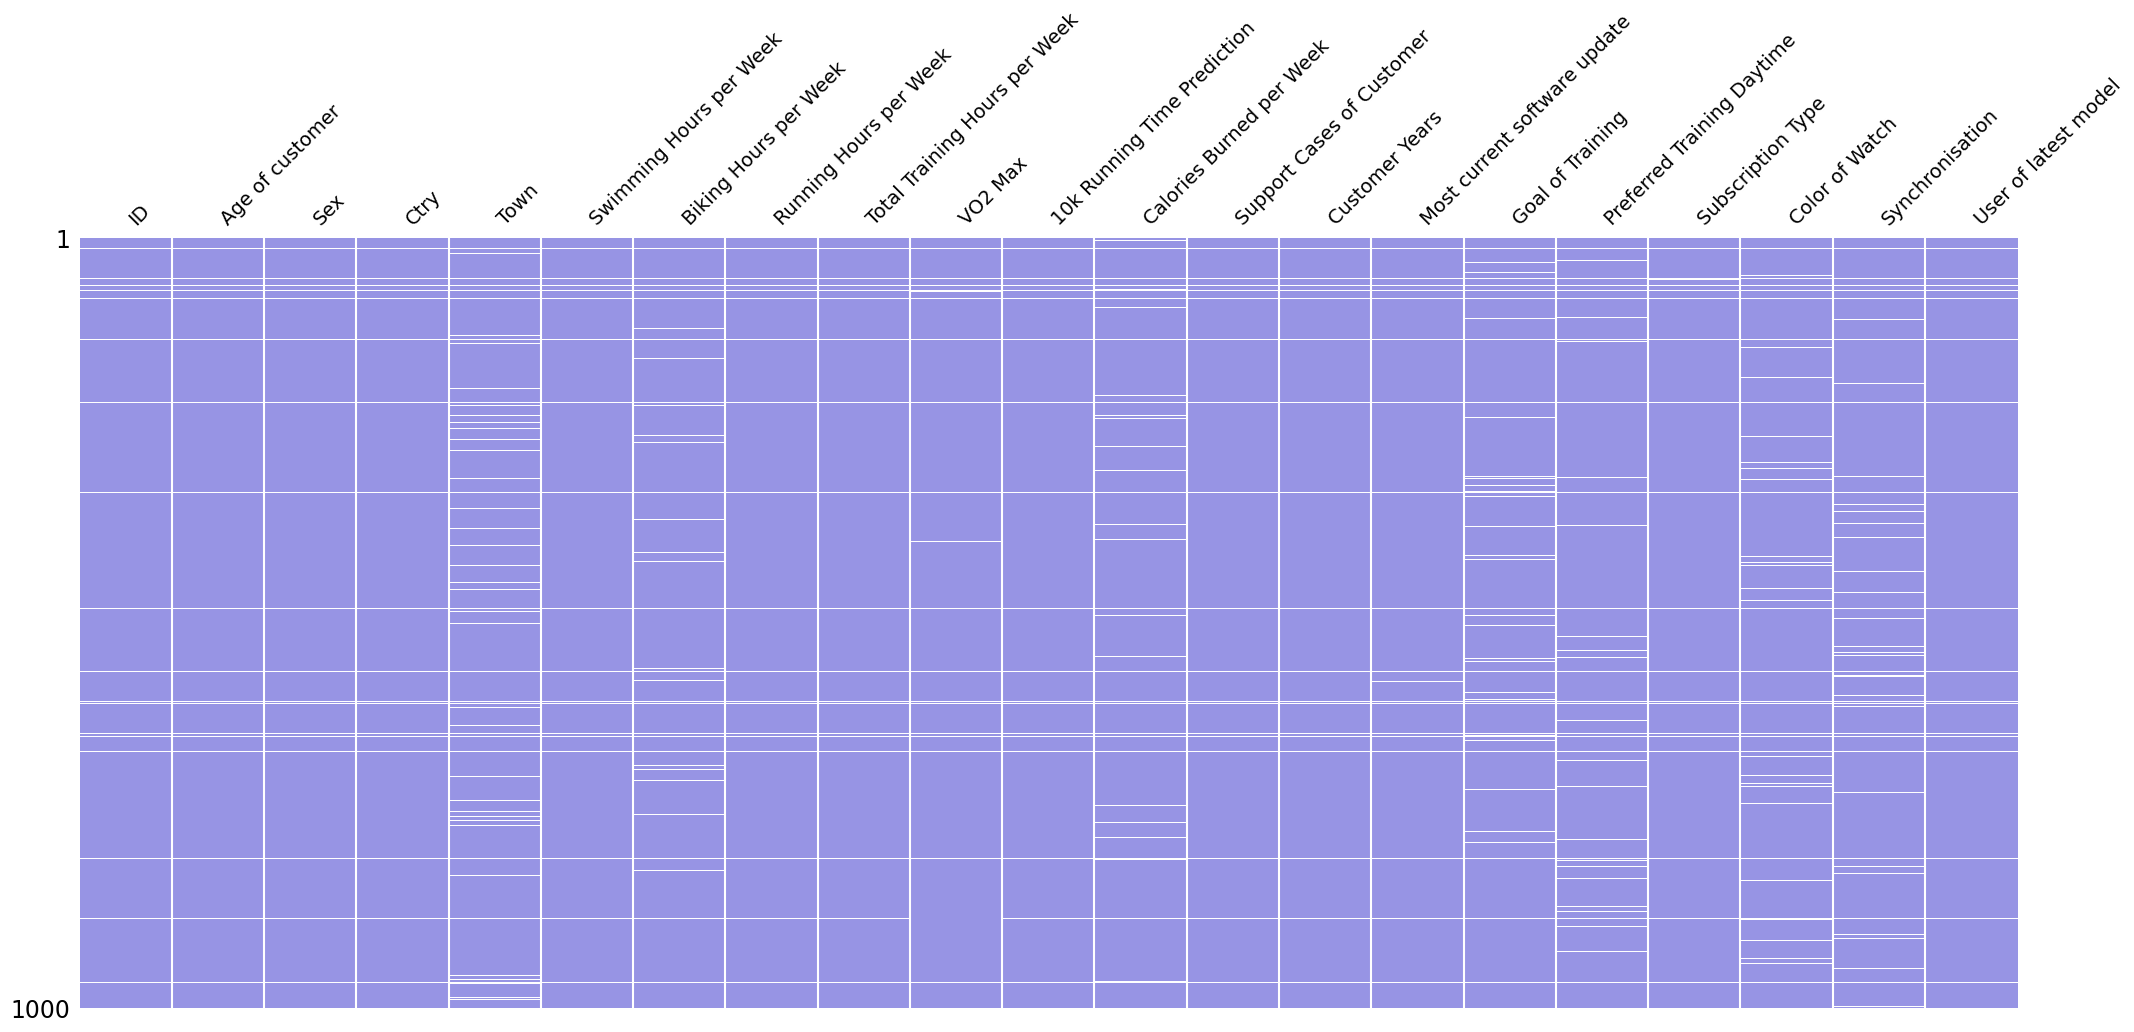

In [47]:
msno.matrix(df_training, color= hex_to_rgb_normalized(color1), fontsize=14, sparkline=False)

In [75]:
count_missing_values = pd.DataFrame(df_training.isnull().sum().sort_values(ascending=False))
count_missing_values.columns = ['Anzahl fehlender Werte']
count_missing_values

,Anzahl fehlender Werte
Town,61
Color of Watch,54
Goal of Training,50
Synchronisation,50
Biking Hours per Week,46
Preferred Training Daytime,46
Calories Burned per Week,41
VO2 Max,25
Subscription Type,23
Most current software update,23


Die Zeilen, indem das Label **User of latest model** fehlt, sollten entfernt werden.

In [78]:
count_missing_values_label = pd.DataFrame(df_training[df_training['User of latest model'].isnull()].isnull().sum().sort_values(ascending=False))
count_missing_values_label.columns = ['Anzahl fehlender Werte, wenn Label fehlt']
count_missing_values_label

,"Anzahl fehlender Werte, wenn Label fehlt"
ID,22
Age of customer,22
Sex,22
Ctry,22
Town,22
Swimming Hours per Week,22
Biking Hours per Week,22
Running Hours per Week,22
Total Training Hours per Week,22
10k Running Time Prediction,22


Bis auf einem Wert in Spalte `VO2 Max` sind alle anderen Spalten komplett leer, wenn das Label fehlt. Diese Zeilen sollten also gelöscht werden.

In [100]:
missing_values_summary = count_missing_values.join(count_missing_values_label)

In [101]:
missing_values_summary['Anzahl fehlender Werte nach entfernen der leeren Zeilen des Labels'] = missing_values_summary['Anzahl fehlender Werte'] - missing_values_summary['Anzahl fehlender Werte, wenn Label fehlt']
missing_values_summary

,Anzahl fehlender Werte,"Anzahl fehlender Werte, wenn Label fehlt",Anzahl fehlender Werte nach entfernen der leeren Zeilen des Labels
Town,61,22,39
Color of Watch,54,22,32
Goal of Training,50,22,28
Synchronisation,50,22,28
Biking Hours per Week,46,22,24
Preferred Training Daytime,46,22,24
Calories Burned per Week,41,22,19
VO2 Max,25,21,4
Subscription Type,23,22,1
Most current software update,23,22,1


In [103]:
missing_values_summary['Anzahl fehlender Werte nach entfernen der leeren Zeilen des Labels'].sum()

np.int64(200)

In [93]:
df_training[(df_training.isnull().sum(axis=1) > 2) & (df_training['User of latest model'].notnull())]

,ID,Age of customer,Sex,Ctry,Town,Swimming Hours per Week,Biking Hours per Week,Running Hours per Week,Total Training Hours per Week,VO2 Max,...,Calories Burned per Week,Support Cases of Customer,Customer Years,Most current software update,Goal of Training,Preferred Training Daytime,Subscription Type,Color of Watch,Synchronisation,User of latest model


In [94]:
df_training[(df_training.isnull().sum(axis=1) > 1) & (df_training['User of latest model'].notnull())]

,ID,Age of customer,Sex,Ctry,Town,Swimming Hours per Week,Biking Hours per Week,Running Hours per Week,Total Training Hours per Week,VO2 Max,...,Calories Burned per Week,Support Cases of Customer,Customer Years,Most current software update,Goal of Training,Preferred Training Daytime,Subscription Type,Color of Watch,Synchronisation,User of latest model
217,C0217,-1.0,Female,India,NaN,2.31,NaN,4.43,13.33,40.33,...,6736.52,0.0,6.0,2024-05-10,Fitness,Evening,Free,Black,Yes,0.0
230,C0230,38.0,Other,UK,NaN,1.84,3.69,1.01,6.53,58.59,...,NaN,1.0,8.0,2023-12-19,Recreation,Evening,Free,Black,Yes,0.0
309,C0310,64.0,Male,Germany,Berlin,2.04,1.77,6.56,10.37,18.90,...,5254.97,4.0,1.0,2024-06-07,NaN,Afternoon,Basic,Black,NaN,0.0
312,C0313,28.0,Other,USA,NaN,0.00,9.84,5.78,15.62,67.25,...,8037.13,3.0,3.0,2024-04-01,NaN,Afternoon,Basic,White,Yes,1.0
425,C0426,29.0,Other,UK,NaN,2.70,5.21,2.13,10.04,57.51,...,4775.57,3.0,2.0,2024-02-28,Competition,Morning,Free,NaN,Yes,1.0
490,C0491,20.0,Female,Australia,Sydney,2.45,4.73,6.53,13.71,59.61,...,NaN,3.0,2.0,2024-11-26,NaN,Morning,Free,Black,Yes,1.0
712,C0707,19.0,Other,Australia,Melbourne,2.62,7.40,1.60,11.62,54.03,...,5962.87,4.0,1.0,2024-07-17,Fitness,NaN,Premium,NaN,Yes,1.0
719,C0714,31.0,Female,Australia,Melbourne,3.05,NaN,5.22,10.77,63.79,...,5525.89,3.0,5.0,2024-05-30,NaN,Morning,Basic,Black,Yes,1.0
816,C0816,59.0,Male,India,Delhi,0.82,4.92,1.95,7.70,26.12,...,4063.31,4.0,3.0,2024-12-08,Fitness,NaN,Basic,Black,NaN,0.0


Wenn die Zeilen gelöscht werden, in denen das Label NaN ist, wird keine weitere zeilenweise Löschung empfohlen. Es tritt kein Fall auf, bei dem innerhalb einer Zeile mehr als 2 Werte fehlen. Eine einfache Löschung dieser Zeilen, würde zu viele Informationen eleminieren. Für das Füllen der restlichen 200 fehlenden Werte muss eine andere Taktik verwendet werden.

In [109]:
# Betrachtung der Spalten, in denen nach der zeilenweisen Löschung noch fehlende Werte vorhanden sind
filtered_df = df_training[(df_training.isnull().sum(axis=1) > 0) & (df_training['User of latest model'].notnull())]
filtered_df[filtered_df.columns[filtered_df.isnull().any()]]

,Town,Biking Hours per Week,VO2 Max,Calories Burned per Week,Most current software update,Goal of Training,Preferred Training Daytime,Subscription Type,Color of Watch,Synchronisation
3,Munich,4.67,49.0900,NaN,2024-08-11,Recreation,Evening,Premium,Black,No
6,NaN,4.06,247.2578,4835.71,2024-02-03,Recreation,Afternoon,Free,Black,Yes
20,NaN,10.88,25.6600,6184.35,2023-11-10,Competition,Evening,Premium,Black,Yes
29,Brisbane,11.39,65.3100,10017.66,2024-09-13,Competition,NaN,Basic,Black,Yes
31,Mumbai,11.48,45.9500,9604.77,2023-12-30,NaN,Afternoon,Basic,Black,Yes
...,...,...,...,...,...,...,...,...,...,...
984,Berlin,0.62,55.1000,3192.00,2023-12-02,Recreation,Morning,Free,White,NaN
986,NaN,3.35,56.3100,4031.71,2024-02-19,Recreation,Morning,Premium,Black,Yes
988,NaN,2.89,60.0800,4700.03,2024-01-07,Fitness,Morning,Premium,White,Yes
989,Birmingham,9.52,57.0100,8858.12,2024-08-14,Fitness,NaN,Premium,White,Yes


In [126]:
df_training.columns

Index(['ID', 'Age of customer', 'Sex', 'Ctry', 'Town',
       'Swimming Hours per Week', 'Biking Hours per Week',
       'Running Hours per Week', 'Total Training Hours per Week', 'VO2 Max',
       '10k Running Time Prediction', 'Calories Burned per Week',
       'Support Cases of Customer', 'Customer Years',
       'Most current software update', 'Goal of Training',
       'Preferred Training Daytime', 'Subscription Type', 'Color of Watch',
       'Synchronisation', 'User of latest model'],
      dtype='object')

- Die Spalten `VO2 Max`, `Calories Burned per Week` sind numerisch und auf den ersten Blick ist kein direkter Zusammenhang mit anderen Spalten erkennbar, der ein regelbasiertes Verfahren rechtfertigen würde. Hier könnte es Sinn machen, eine Regression Imputation zu verwenden, falls sich in der nachfolgenden EDA aufzeigt, dass diese Werte mit anderen korrelieren.
- Die Spalte `Biking Hours per Week` kann direkt aus den anderen Spalten `Swimming Hours per Week`, `Running Hours per Week` und `Total Training Hours per Week` berechnet werden.
- Für die Spalte `Town` könnte eine regelbasierte Imputation angewandt werden. Je nach Land (`Ctry`) sind nur bestimmte Städte in der Kombination möglich.
- Für die restlichen Spalten kann erst eine Empfehlung gegeben werden, nach weiterer Sichtung der Daten.

In [118]:
unique_combinations = (
    df_training
    .groupby(['Ctry', 'Town'], dropna=False) # Schließt beim Groupby NaN-Werte ein
    .size()  # Zählen der Häufigkeiten
    .reset_index(name='Count')  # Zurücksetzen des Index und Spalte 'Count' benennen
)
unique_combinations.sort_values(by=['Ctry', 'Count'], ascending=False).reset_index(drop=True)

,Ctry,Town,Count
0,UnknownLand,Berlin,1
1,UnknownLand,Brisbane,1
2,UnknownLand,London,1
3,UnknownLand,NaN,1
4,USA,New York,72
5,USA,Chicago,64
6,USA,Los Angeles,56
7,USA,NaN,7
8,UK,Birmingham,70
9,UK,Manchester,58


Hier wird deutlich, dass bspw. eine fehlende Stadt mit dem Land `Australia`, nur die Werte `Sydney`, `Melbourne` oder `Brisbane` annehmen kann. Je nach Zusammenhang mit den anderen Spalten, kann aufgrund anderer Informationen besser entschieden werden, welche von den 3 Möglichkeiten die sinnvollste ist.  
Die Übersicht zeigt ebenfalls, dass innerhalb des Datensatzes auch unplausible Werte auftreten können wie `UnknownLand` oder `Germayn`. Daher werden die Spalten, mit wenig Ausprägungen im Folgenden noch auf unplausible Werte untersucht.

Um den Fehler `UnknownLand` zu beheben, kann eine umgekehrte Logik wie für die Imputation von `Town` angewendet werden. 
- Berlin &rarr; Germany
- London &rarr; UK
- Brisbane &rarr; Australia 

`Germayn` sollte zu `Germany` umgeändert werden.

Diese Anpassungen sollte vor der Imputation von Town erfolgen, da man so mehr Informationen gewinnt.

In [119]:
for col in df_training.columns:
    unique_count = df_training[col].nunique()
    print(f"Spalte: {col}, Anzahl eindeutiger Werte: {unique_count}")

Spalte: ID, Anzahl eindeutiger Werte: 971
Spalte: Age of customer, Anzahl eindeutiger Werte: 48
Spalte: Sex, Anzahl eindeutiger Werte: 3
Spalte: Ctry, Anzahl eindeutiger Werte: 7
Spalte: Town, Anzahl eindeutiger Werte: 15
Spalte: Swimming Hours per Week, Anzahl eindeutiger Werte: 440
Spalte: Biking Hours per Week, Anzahl eindeutiger Werte: 649
Spalte: Running Hours per Week, Anzahl eindeutiger Werte: 542
Spalte: Total Training Hours per Week, Anzahl eindeutiger Werte: 732
Spalte: VO2 Max, Anzahl eindeutiger Werte: 858
Spalte: 10k Running Time Prediction, Anzahl eindeutiger Werte: 805
Spalte: Calories Burned per Week, Anzahl eindeutiger Werte: 948
Spalte: Support Cases of Customer, Anzahl eindeutiger Werte: 5
Spalte: Customer Years, Anzahl eindeutiger Werte: 12
Spalte: Most current software update, Anzahl eindeutiger Werte: 393
Spalte: Goal of Training, Anzahl eindeutiger Werte: 3
Spalte: Preferred Training Daytime, Anzahl eindeutiger Werte: 3
Spalte: Subscription Type, Anzahl eindeutig

In [124]:
for col in df_training.columns:
    unique_count = df_training[col].nunique()
    if unique_count < 50:  # Bedingung: nur Spalten mit weniger als 50 eindeutigen Werten
        unique_values = df_training[col].unique()

        # Umwandlung der Werte in native Python-Typen
        unique_values_converted = [float(x) if isinstance(x, np.float64) else x for x in unique_values]

        # NaN-Werte an das Ende verschieben und sortieren
        unique_values_sorted = sorted(unique_values_converted, key=lambda x: (isinstance(x, float) and np.isnan(x), x))

        print(f"Spalte: {col}, Anzahl eindeutiger Werte: {unique_count}")
        print("Eindeutige Werte:", unique_values_sorted)
        print("="*50)  # Trennung für bessere Lesbarkeit



Spalte: Age of customer, Anzahl eindeutiger Werte: 48
Eindeutige Werte: [-1.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, nan]
Spalte: Sex, Anzahl eindeutiger Werte: 3
Eindeutige Werte: ['Female', 'Male', 'Other', nan]
Spalte: Ctry, Anzahl eindeutiger Werte: 7
Eindeutige Werte: ['Australia', 'Germany', 'Germayn', 'India', 'UK', 'USA', 'UnknownLand', nan]
Spalte: Town, Anzahl eindeutiger Werte: 15
Eindeutige Werte: ['Bangalore', 'Berlin', 'Birmingham', 'Brisbane', 'Chicago', 'Delhi', 'Hamburg', 'London', 'Los Angeles', 'Manchester', 'Melbourne', 'Mumbai', 'Munich', 'New York', 'Sydney', nan]
Spalte: Support Cases of Customer, Anzahl eindeutiger Werte: 5
Eindeutige Werte: [0.0, 1.0, 2.0, 3.0, 4.0, nan]
Spalte: Customer Years, Anzahl eindeutiger Werte: 1

Neben den bereits gefunden unplausiblen Werten in `Ctry` gibt es ebenfalls einen unplausiblen Wert für `Age of customer`: **-1**  
Dieser sollte ebenfalls wie ein fehlender Wert behandelt werden.  
Für numerische stetige Features können unplausible Werte entdeckt werden, wenn sie als Ausreißer erkannt werden. 

### EDA numerische Variablen

In [183]:
numerical_cols = df_training.select_dtypes(include=['number']).columns
numeric_features = df_training[numerical_cols].drop(columns=['User of latest model']).columns
label = 'User of latest model'
features = df_training.drop(columns=['User of latest model'])

#### Einblick Verteilung

In [145]:
df_training[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age of customer,978.0,40.529652,14.072180,-1.00,29.0000,41.000,53.0000,64.0000
Swimming Hours per Week,978.0,2.226196,1.595254,0.00,1.0200,2.020,3.1875,9.9700
Biking Hours per Week,954.0,5.529109,3.499372,0.00,2.7675,5.110,7.8700,16.1100
Running Hours per Week,978.0,3.262219,2.165709,0.00,1.6350,2.930,4.6000,11.8700
Total Training Hours per Week,978.0,11.446155,8.038531,0.15,7.3800,10.220,14.0975,100.0000
VO2 Max,975.0,51.374066,21.459113,10.22,42.0700,53.400,60.0950,247.2578
10k Running Time Prediction,978.0,45.610521,7.549771,29.12,40.3025,43.885,50.2575,67.0600
Calories Burned per Week,959.0,5487.534849,2499.741648,-47.26,3661.9400,5168.410,7000.8400,13280.0600
Support Cases of Customer,978.0,1.956033,1.413167,0.00,1.0000,2.000,3.0000,4.0000
Customer Years,978.0,3.792434,2.916593,0.00,1.0000,3.000,6.0000,11.0000


array([[<Axes: title={'center': 'Age of customer'}>,
        <Axes: title={'center': 'Swimming Hours per Week'}>,
        <Axes: title={'center': 'Biking Hours per Week'}>],
       [<Axes: title={'center': 'Running Hours per Week'}>,
        <Axes: title={'center': 'Total Training Hours per Week'}>,
        <Axes: title={'center': 'VO2 Max'}>],
       [<Axes: title={'center': '10k Running Time Prediction'}>,
        <Axes: title={'center': 'Calories Burned per Week'}>,
        <Axes: title={'center': 'Support Cases of Customer'}>],
       [<Axes: title={'center': 'Customer Years'}>,
        <Axes: title={'center': 'User of latest model'}>, <Axes: >]],
      dtype=object)

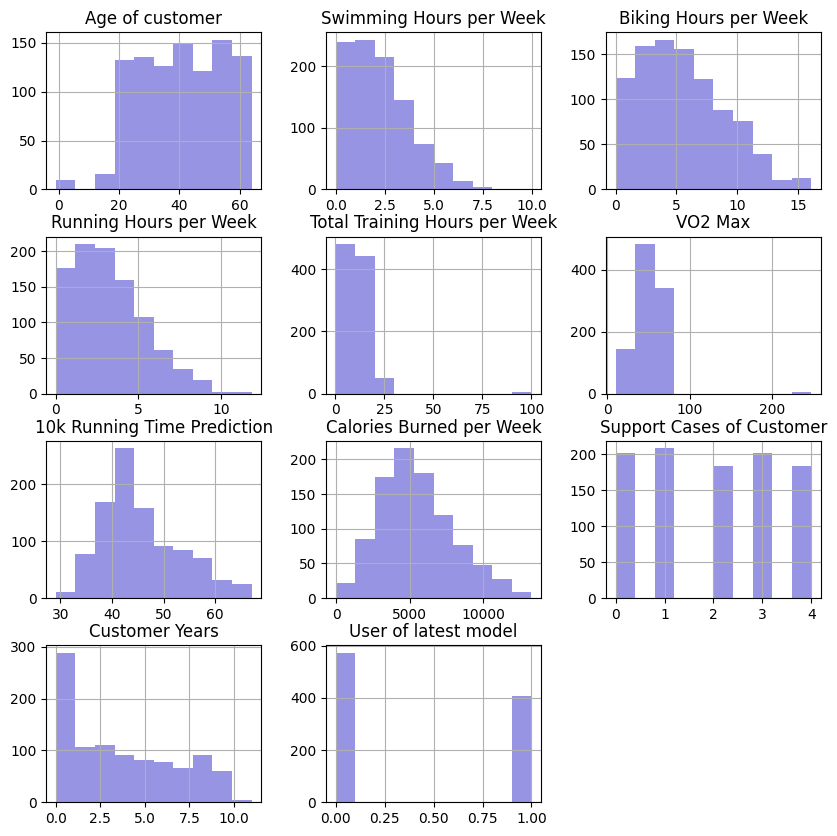

In [127]:
df_training.hist(figsize=(10,10), color= hex_to_rgb_normalized(color1))

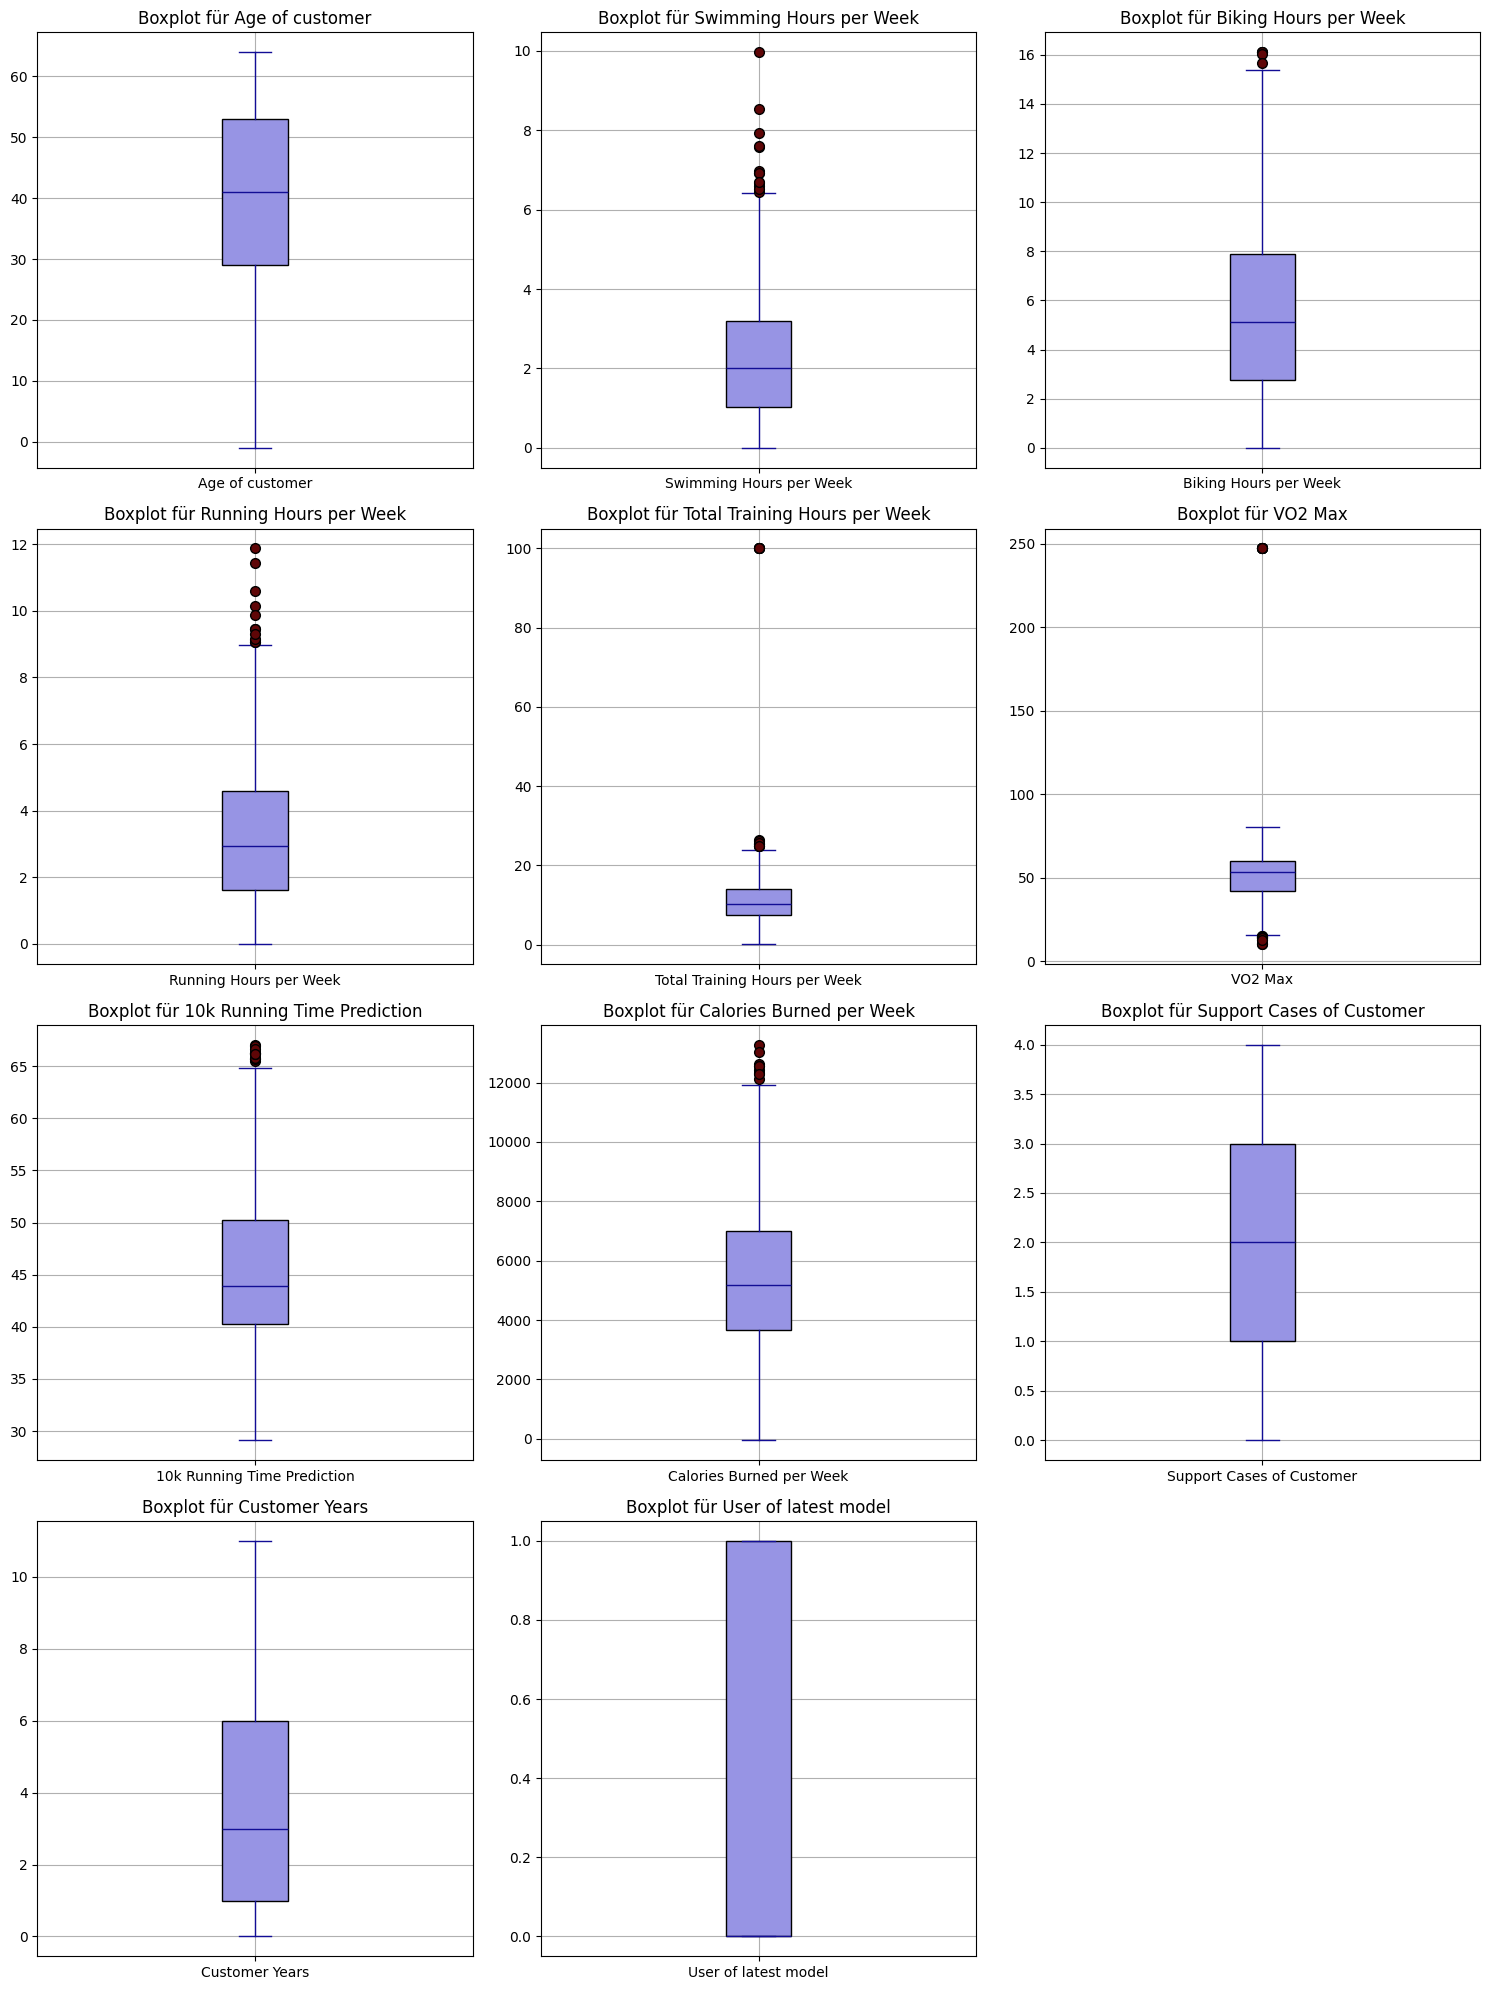

In [137]:
# Rastergröße festlegen (z.B. 2 Zeilen und so viele Spalten wie benötigt)
ncols = 3  # Anzahl der Spalten im Raster
nrows = (len(numerical_cols) // ncols) + (len(numerical_cols) % ncols > 0)  # Berechnet die notwendige Anzahl an Zeilen

# Subplots erstellen
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# Alle Achsen in einer Liste speichern, um sie zu iterieren
axes = axes.flatten()

# Durch jede numerische Spalte iterieren und einen Boxplot erstellen
for i, col in enumerate(numerical_cols):
    ax = axes[i]  # Der aktuelle Achsenbereich
    df_training.boxplot(column=col, ax=ax, patch_artist=True, 
                        boxprops=dict(facecolor=color1, color='black'), 
                        whiskerprops=dict(color=color2),
                        flierprops=dict(markerfacecolor=color3, marker='o', markersize=7),
                        capprops=dict(color=color2),
                        medianprops=dict(color=color2))
    ax.set_title(f"Boxplot für {col}")
    ax.grid(True)

# Überflüssige Subplots ausblenden (falls es mehr Plätze im Raster gibt als Spalten)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Plot anzeigen
plt.tight_layout()  # Layout anpassen
plt.show()

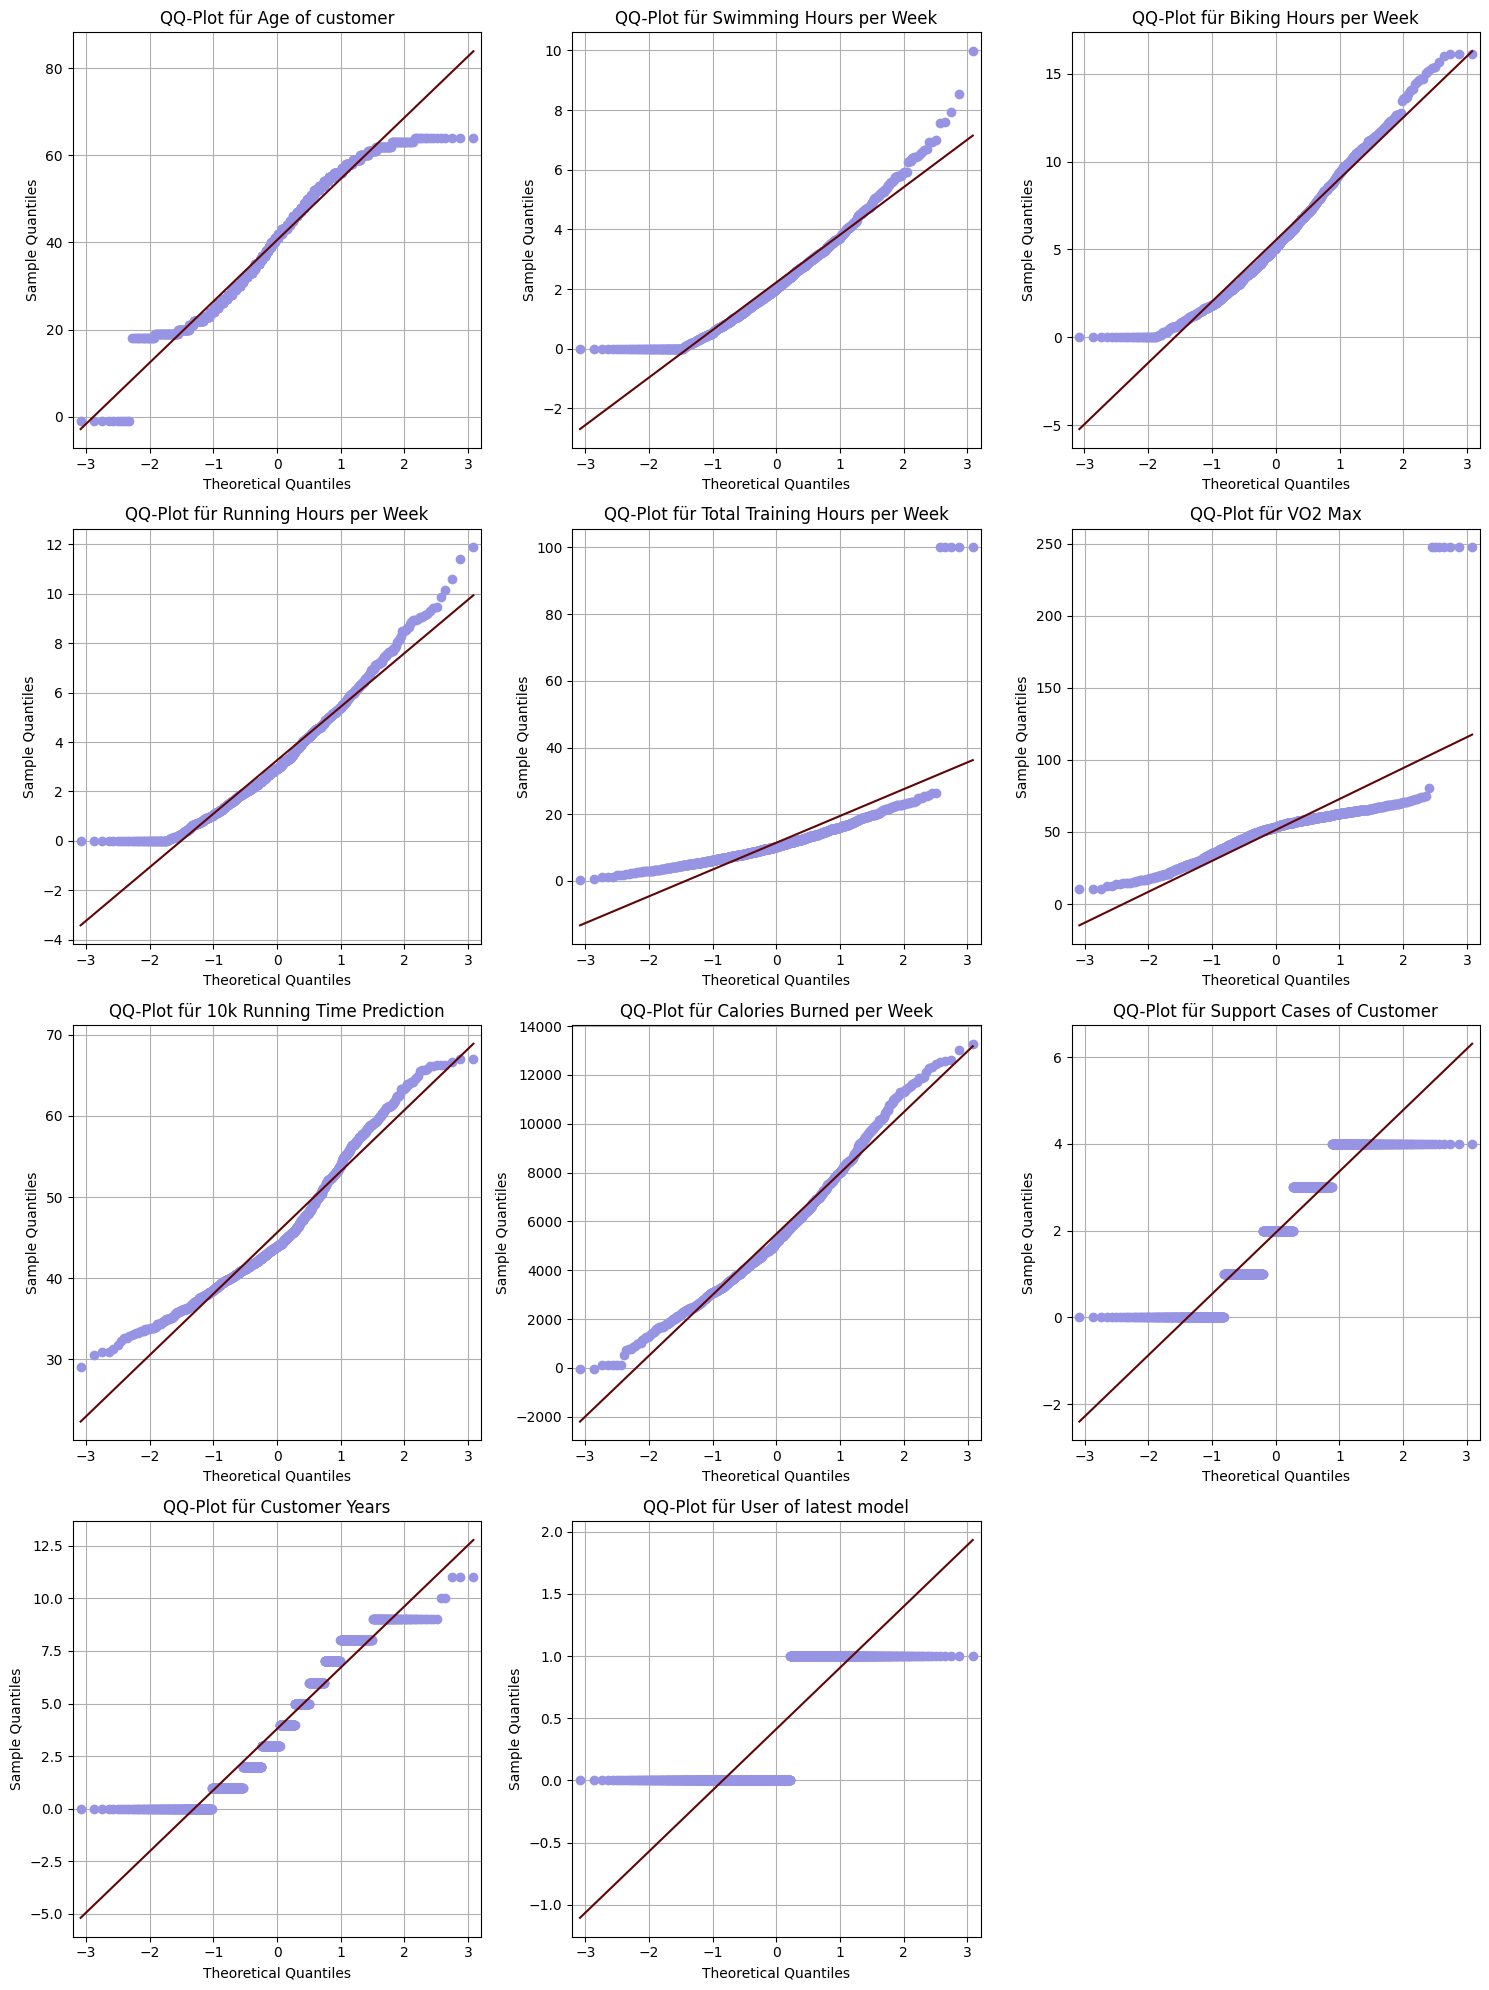

In [206]:

# Rastergröße festlegen (z.B. 2 Zeilen und so viele Spalten wie benötigt)
ncols = 3  # Anzahl der Spalten im Raster
nrows = (len(numerical_cols) // ncols) + (len(numerical_cols) % ncols > 0)  # Berechnet die notwendige Anzahl an Zeilen

# Subplots erstellen
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# Alle Achsen in einer Liste speichern, um sie zu iterieren
axes = axes.flatten()

# Durch jede numerische Spalte iterieren und einen QQ-Plot erstellen
for i, col in enumerate(numerical_cols):
    ax = axes[i]  # Der aktuelle Achsenbereich
    
    # QQ-Plot erstellen, aber diesmal speichern wir das Objekt (der Plot wird hier erstellt)
    qq = qqplot(df_training[col].dropna(), line='s', ax=ax)
    
    # Extrahiere die Linienobjekte
    lines = ax.get_lines()
    
    # Setze die Farbe der Linie (die theoretische Normalverteilungslinie)
    lines[1].set_color(color3)  # Die zweite Linie ist die 'line=s' Linie
    
    # Setze die Farbe der Datenpunkte (erste Linie ist der Scatterplot)
    lines[0].set_markerfacecolor(color1)
    lines[0].set_markeredgecolor(color1)
    
    # Achsentitel und Gitter
    ax.set_title(f"QQ-Plot für {col}")
    ax.grid(True)

# Überflüssige Subplots ausblenden (falls es mehr Plätze im Raster gibt als Spalten)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Plot anzeigen
plt.tight_layout()  # Layout anpassen
plt.show()

In [303]:
# Schiefe
skewness = df_training[numerical_cols].skew()

skewness_df = pd.DataFrame({
    'Spalte': skewness.index,
    'Schiefe': skewness.values,
    'Kategorie': [categorize_skewness(val) for val in skewness]
})

skewness_df

,Spalte,Schiefe,Kategorie
0,Age of customer,-0.205840,eher symmetrisch
1,Swimming Hours per Week,0.790590,leicht rechtschief
2,Biking Hours per Week,0.526163,leicht rechtschief
3,Running Hours per Week,0.697999,leicht rechtschief
4,Total Training Hours per Week,6.928020,stark rechtsschief
5,VO2 Max,5.194915,stark rechtsschief
6,10k Running Time Prediction,0.682588,leicht rechtschief
7,Calories Burned per Week,0.533698,leicht rechtschief
8,Support Cases of Customer,0.038682,eher symmetrisch
9,Customer Years,0.340594,eher symmetrisch


In [304]:
# Prüfung auf Normalverteilung
for col in numerical_cols:
    print(f'\nShapiro-Wilk Test für Spalte: {col}')
    shapiro_wilk_test(df_training[col].dropna(), 0.05)
    print('-' * 40)


Shapiro-Wilk Test für Spalte: Age of customer
Statistics=0.964, p=0.00000
Sample does not look Gaussian (reject H0)
----------------------------------------

Shapiro-Wilk Test für Spalte: Swimming Hours per Week
Statistics=0.953, p=0.00000
Sample does not look Gaussian (reject H0)
----------------------------------------

Shapiro-Wilk Test für Spalte: Biking Hours per Week
Statistics=0.969, p=0.00000
Sample does not look Gaussian (reject H0)
----------------------------------------

Shapiro-Wilk Test für Spalte: Running Hours per Week
Statistics=0.961, p=0.00000
Sample does not look Gaussian (reject H0)
----------------------------------------

Shapiro-Wilk Test für Spalte: Total Training Hours per Week
Statistics=0.569, p=0.00000
Sample does not look Gaussian (reject H0)
----------------------------------------

Shapiro-Wilk Test für Spalte: VO2 Max
Statistics=0.607, p=0.00000
Sample does not look Gaussian (reject H0)
----------------------------------------

Shapiro-Wilk Test für Sp

**Erkenntnisse Verteilung numerische Variablen**  
- `Age of customer`  
Bis auf den Datenfehler von -1 und die Kunden unter 20 sind die Daten relativ gleichverteilt.

- `Swimming Hours per Week`  
Daten sind rechtsschief.
- `Biking Hours per Week`  
Daten sind rechtsschief.
- `Running Hours per Week`  
Daten sind rechtsschief.
- `Total Training Hours per Week`  
Daten sind rechtsschief. Der Ausreißer von 100 wirkt wie ein Datenfehler, da die Aufsummierung der Maximalwerte von den 3 anderen Spalten `Swimming Hours per Week`, `Biking Hours per Week`, `Running Hours per Week` nicht die 100 ergibt. Der Datenpunkt muss sich im Folgenden näher angeschaut werden. Allgemein sollte eine Prüfung erfolgen, ob die drei Spalten tatsächlich immer aufsummiert werden können, um den Wert von `Total Training Hours per Week` zu erhalten.
- `VO2 Max`  
Vergleicht man den Mittelwert mit dem Median, sind die Daten eher linksschief (Mittelwert < Median). Allerdings verfälscht der Ausreißer von 247.2578 das Bild. Dieser sollte sich im nächsten Schritt auch genauer angeschaut werden.
- `10k Running Time Prediction`  
Anhand der Vergleichs von Mittelwert und Median ist prinzipiell von einer Rechtsschiefe auszugehen. Optisch gesehen zeigt das Histogramm eine annähernde Normalverteilung.
- `Calories Burned per Week`  
Anhand der Vergleichs von Mittelwert und Median ist prinzipiell von einer Rechtsschiefe auszugehen. Optisch gesehen zeigt das Histogramm eine annähernde Normalverteilung.
- `Support Cases of Customer`  
Daten wirken gleichverteilt.
- `Customer Years`  
Daten wirken durch hohe Anzahl bei 0 rechtsschief. Laut Berechnung der Schiefe können sie jedoch als symmetrisch betrachtet werden.
- `User of latest model`  
Es gibt allgemein weniger Kunden, die das letzte Modell nutzen.  

Die Spalten `Support Cases of Customer`, `Customer Years` sowie das Label `User of latest model` haben wenig Ausprägungen und sollten in der Analyse von Zusammenhängen nicht in die Korrelationsanalyse einfließen. Bei der Spalte `Age of customer` ist dies stritig. Es ist eine diskrete Variable, die allerdings (vor Datenbereinigung) 48 Ausprägungen zeigt. Somit könnte sie innerhalb einer Korrelationsanalyse untersucht werden.  

Allgemein lässt sich sagen, dass keine der numerischen Spalten normalverteilt ist. Alle Spalten benötigen daher eine Transformation.

In [172]:
# Überprüfung der Traingszeiten
df_traintimes = df_training[['Biking Hours per Week', 'Swimming Hours per Week', 'Running Hours per Week', 'Total Training Hours per Week']].copy()
df_traintimes['test'] = df_traintimes['Total Training Hours per Week'] - (df_traintimes['Biking Hours per Week'] + df_traintimes['Swimming Hours per Week'] + df_traintimes['Running Hours per Week'])
df_traintimes.sort_values(by='test', ascending=False).head(6)

,Biking Hours per Week,Swimming Hours per Week,Running Hours per Week,Total Training Hours per Week,test
184,6.43,0.89,3.28,100.0,89.40
74,6.61,2.75,1.57,100.0,89.07
250,3.66,2.24,7.24,100.0,86.86
649,7.09,6.98,7.17,100.0,78.76
929,13.54,1.10,8.76,100.0,76.60
726,9.34,0.45,0.00,9.8,0.01


Die Zeilen, in denen `Total Training Hours per Week` 100 ist, sollten durch die Addition der anderen 3 Trainingszeitenspalten ersetzt werden. Der Wert von 100 ist unplausibel und entspricht nicht der zu erwartenden Regel. Er sollte im Zuge der "Missing Value Behandlung" ersetzt werden.

In [178]:
# Überprüfung Maximalwert bei VO2 Max
df_training.sort_values(by='VO2 Max', ascending=False).head(15)

,ID,Age of customer,Sex,Ctry,Town,Swimming Hours per Week,Biking Hours per Week,Running Hours per Week,Total Training Hours per Week,VO2 Max,...,Calories Burned per Week,Support Cases of Customer,Customer Years,Most current software update,Goal of Training,Preferred Training Daytime,Subscription Type,Color of Watch,Synchronisation,User of latest model
428,C0429,31.0,Female,Australia,Sydney,4.66,5.64,5.71,16.00,247.2578,...,7960.27,4.0,6.0,2024-12-26,Fitness,Morning,Free,Black,Yes,0.0
6,C0008,30.0,Female,UK,NaN,0.84,4.06,4.23,9.12,247.2578,...,4835.71,4.0,3.0,2024-02-03,Recreation,Afternoon,Free,Black,Yes,0.0
214,C0214,38.0,Male,India,Bangalore,1.47,6.64,1.44,9.55,247.2578,...,4779.57,0.0,3.0,2024-06-27,Recreation,Morning,Premium,Black,Yes,1.0
152,C0153,48.0,Other,India,Delhi,4.04,9.70,6.23,19.98,247.2578,...,10273.42,1.0,2.0,2024-05-30,Competition,Morning,Premium,Black,Yes,1.0
611,C0610,35.0,Female,USA,New York,1.74,10.82,0.64,13.20,247.2578,...,6658.03,1.0,2.0,2023-11-05,Competition,Afternoon,Basic,Black,Yes,1.0
506,C0507,61.0,Male,India,Delhi,0.00,2.60,2.21,4.81,247.2578,...,2456.22,3.0,5.0,2024-05-01,Recreation,Evening,Premium,Black,Yes,0.0
883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,247.2578,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
928,C0931,31.0,Other,India,Delhi,3.56,14.70,5.43,23.70,80.5400,...,12106.35,4.0,8.0,2024-07-31,Competition,Afternoon,Basic,Black,Yes,1.0
837,C0838,35.0,Other,UK,London,2.73,12.74,9.30,24.77,75.0700,...,12324.68,0.0,0.0,2023-10-26,Competition,Afternoon,Basic,Black,Yes,1.0
826,C0826,40.0,Other,Australia,Brisbane,3.64,9.15,7.31,20.10,74.3000,...,10138.03,0.0,8.0,2024-04-07,Competition,Morning,Premium,White,Yes,1.0


Der Wert 247,2578 bei der Spalte `VO2 Max` ist unplausibel. Er sollte angepasst werden im Zuge der "Missing Value"-Behandlung.

#### Einblick Zusammenhänge

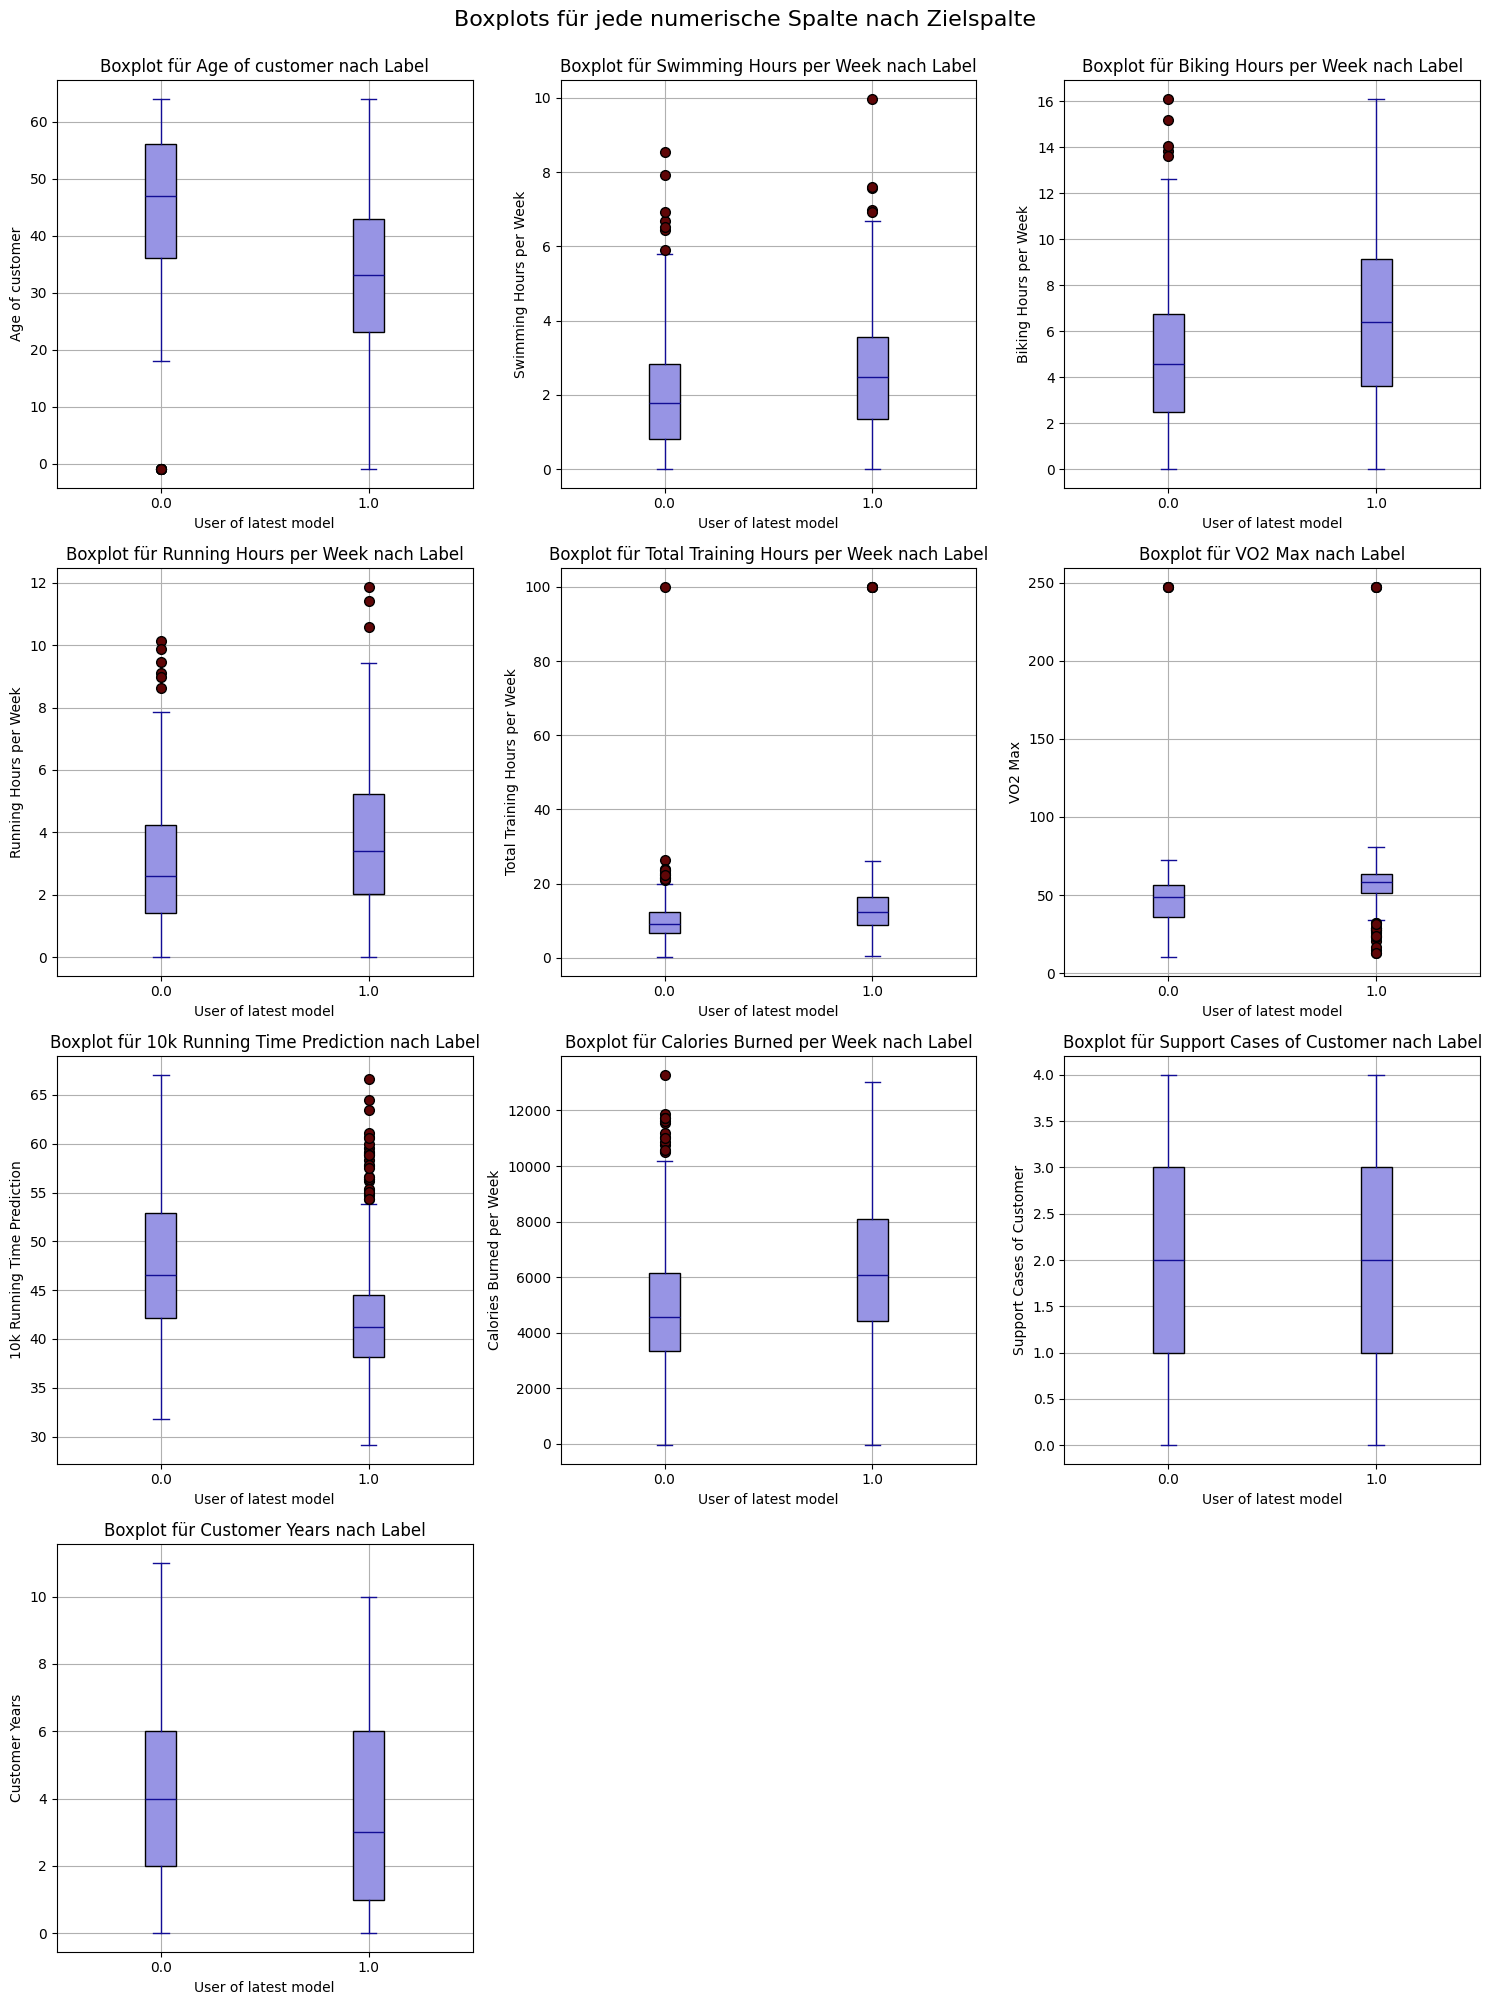

In [156]:
ncols = 3  # Anzahl der Spalten im Raster
nrows = (len(numeric_features) // ncols) + (len(numeric_features) % ncols > 0)  # Berechnet die notwendige Anzahl an Zeilen

# Subplots erstellen
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# Alle Achsen in einer Liste speichern, um sie zu iterieren
axes = axes.flatten()

# Durch jede numerische Spalte iterieren und Boxplot für beide Kategorien des Labels erstellen
for i, col in enumerate(numeric_features):
    ax = axes[i]  # Der aktuelle Achsenbereich

    # Boxplot für die Zielspalte auf der x-Achse (label)
    df_training.boxplot(column=col, by=label, ax=ax, patch_artist=True,
                        boxprops=dict(facecolor=color1, color='black'),  # Farbe für Kategorie 0
                        whiskerprops=dict(color=color2),
                        flierprops=dict(markerfacecolor=color3, marker='o', markersize=7),
                        capprops=dict(color=color2),
                        medianprops=dict(color=color2))

    # Titel und Achsenbeschriftung anpassen
    ax.set_title(f"Boxplot für {col} nach Label")
    ax.set_xlabel(label)
    ax.set_ylabel(col)
    ax.grid(True)

# Überflüssige Subplots ausblenden (falls es mehr Plätze im Raster gibt als Spalten)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Layout anpassen
plt.tight_layout() 

# Titel für das gesamte Grid
fig.suptitle('Boxplots für jede numerische Spalte nach Zielspalte', fontsize=16, y=1.0)


# Plot anzeigen
plt.show()


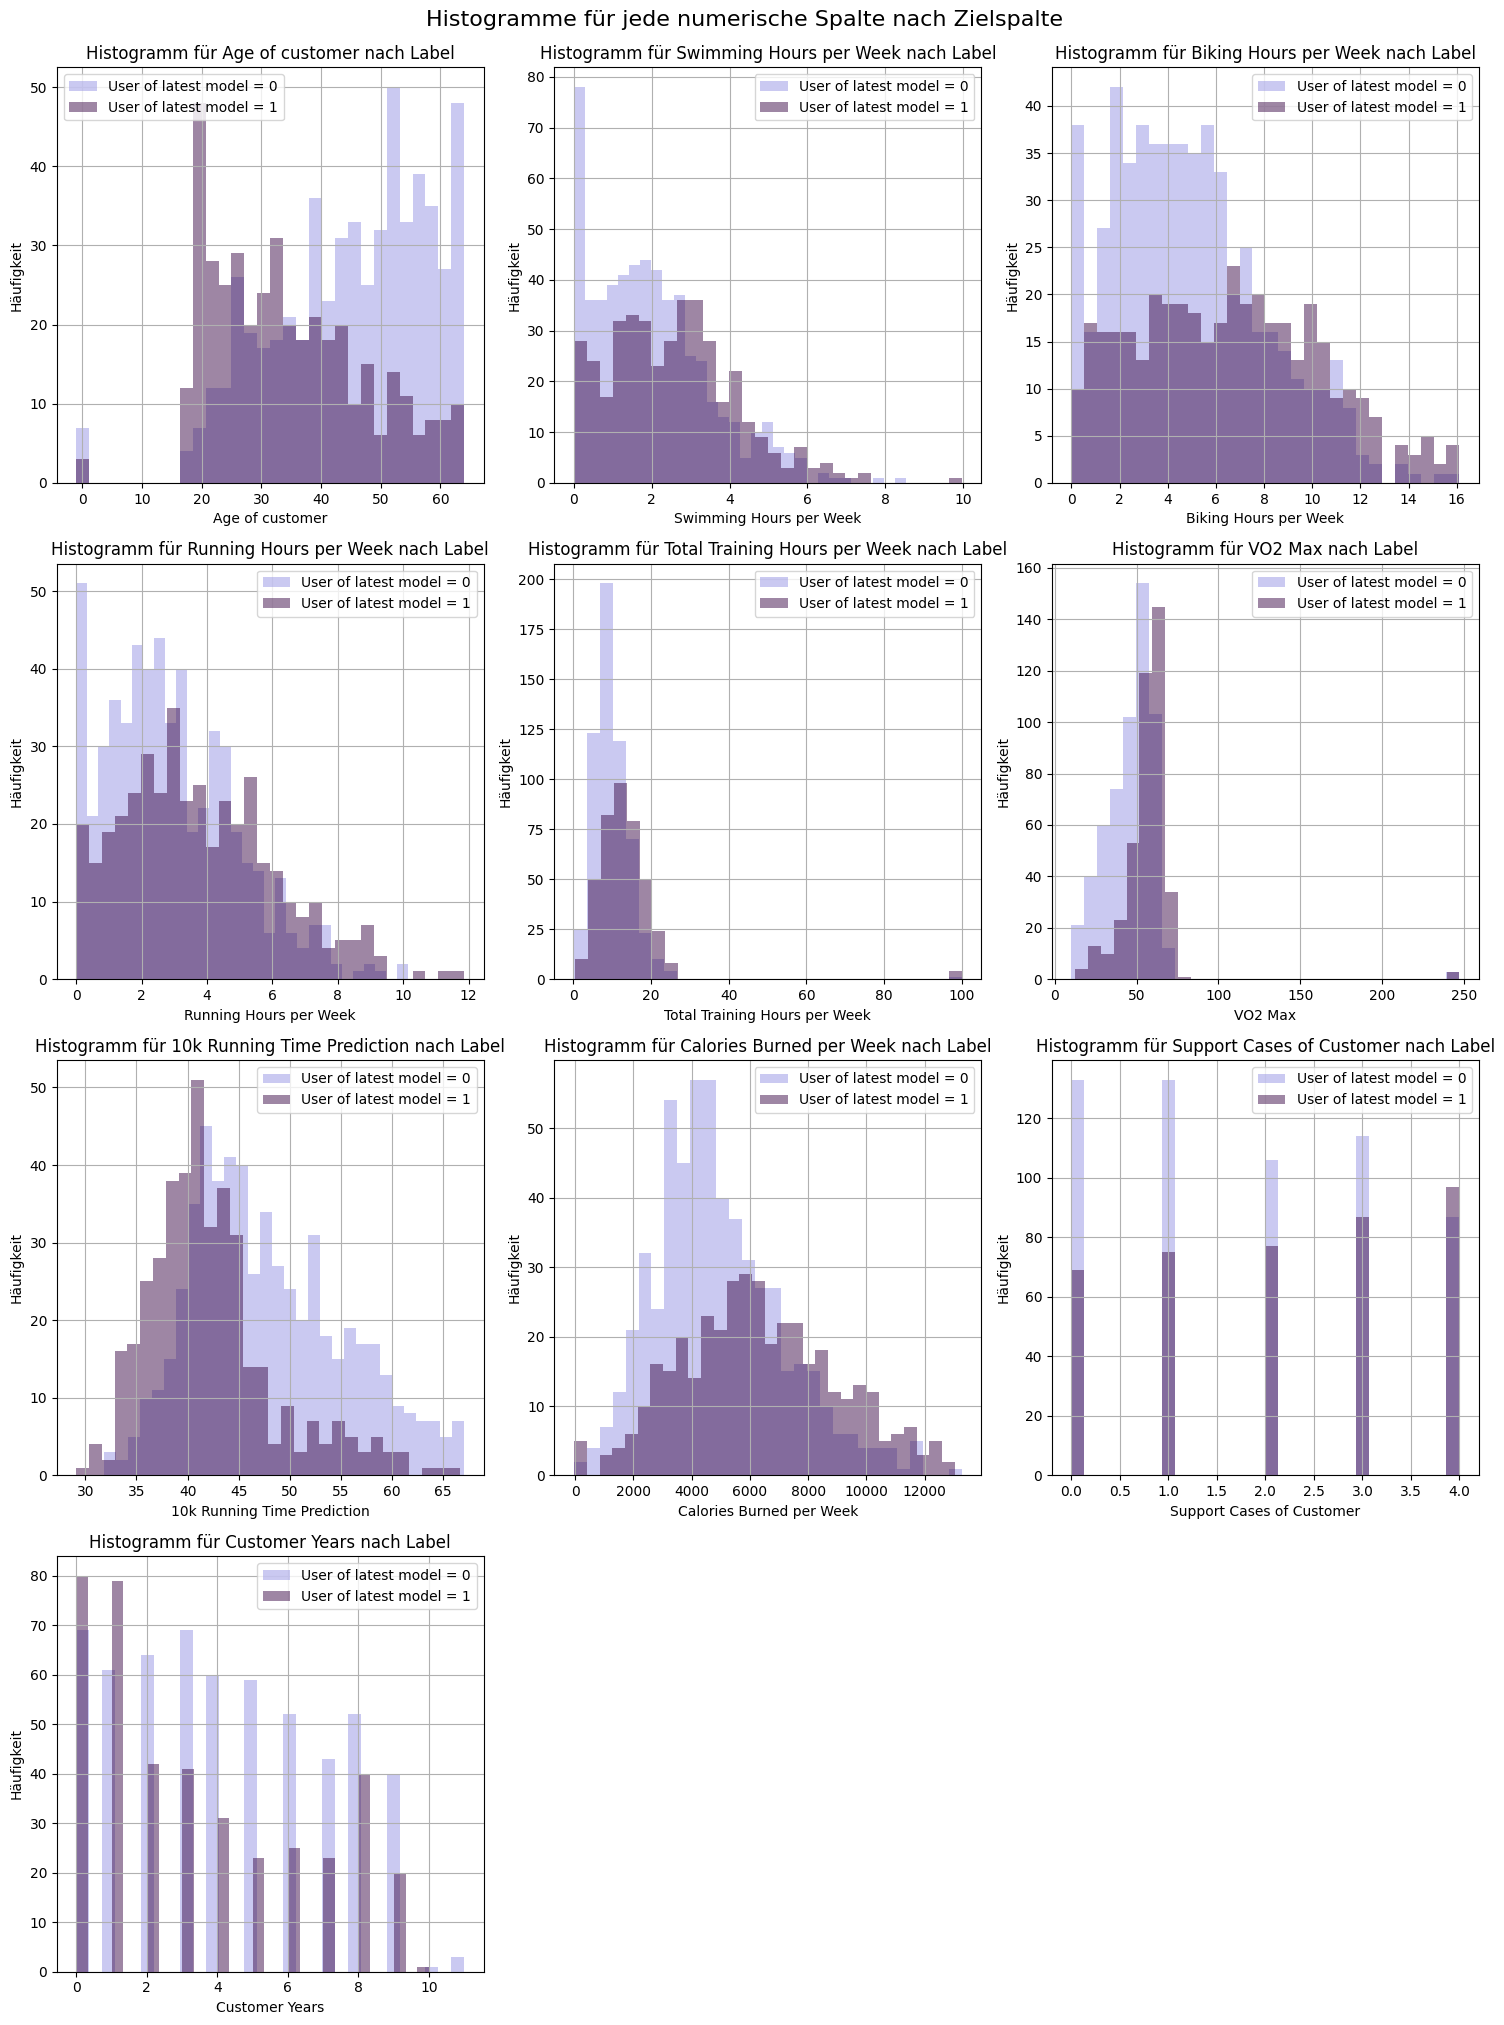

In [162]:
ncols = 3  # Anzahl der Spalten im Raster
nrows = (len(numeric_features) // ncols) + (len(numeric_features) % ncols > 0)  # Berechnet die notwendige Anzahl an Zeilen

# Subplots erstellen
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# Alle Achsen in einer Liste speichern, um sie zu iterieren
axes = axes.flatten()

# Durch jede numerische Spalte iterieren und Histogramm für beide Kategorien des Labels erstellen
for i, col in enumerate(numeric_features):
    ax = axes[i]  # Der aktuelle Achsenbereich

    # Histogramm für jede Ausprägung der Zielspalte (label)
    df_training[df_training[label] == 0][col].hist(bins=30, ax=ax, alpha=0.5, label=f'{label} = 0', color=color1)
    df_training[df_training[label] == 1][col].hist(bins=30, ax=ax, alpha=0.5, label=f'{label} = 1', color=color4)

    # Titel und Achsenbeschriftung anpassen
    ax.set_title(f"Histogramm für {col} nach Label")
    ax.set_xlabel(col)
    ax.set_ylabel('Häufigkeit')
    ax.legend()
    ax.grid(True)

# Überflüssige Subplots ausblenden (falls es mehr Plätze im Raster gibt als Spalten)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Layout anpassen
plt.tight_layout()

# Titel für das gesamte Grid
fig.suptitle('Histogramme für jede numerische Spalte nach Zielspalte', fontsize=16, y=1.01)

# Plot anzeigen
plt.show()


**Erkenntnisse grafische Darstellung Zusammenhang mit Label**  
- `Age of customer`  
Die Nutzer des letzten Modells sind eher jünger.

- `Swimming Hours per Week`, `Biking Hours per Week`, `Running Hours per Week`, `Total Training Hours per Week`  
Die Nutzer des letzten Modells haben höhere Trainingszeiten.

- `VO2 Max`  
Die Nutzer des letzten Modells haben eher höhere Werte.
- `10k Running Time Prediction`  
Die Nutzer des letzten Modells bekommen eher eine niedrigere Zeit vorhergesagt.
- `Calories Burned per Week`  
Die Nutzer des letzten Modells verbrennen eher mehr Kalorien.
- `Support Cases of Customer`  
Anhand der Grafiken lässt sich kein unmittelbarer Zusammenhang erkennen.
- `Customer Years`  
Tendenziell sind es neuere Kunden, die das neuste Modell nutzen.


Eine Korrelartionsanalyse ist prinzipiell nicht sinnvoll, da die Zielvariable nominal ist. Trotzdem wird eine Korrelationsmatrix erstellt, um Koliniearitäten zu identifizieren.

<Axes: >

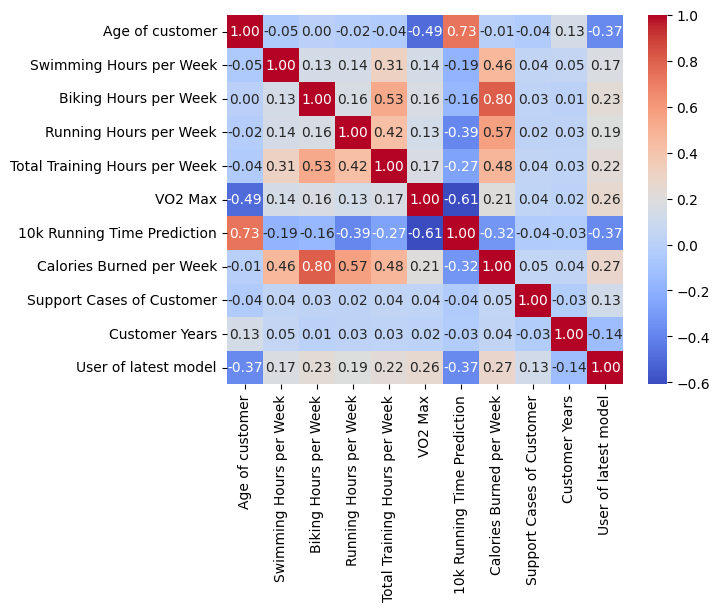

In [182]:
corr = df_training[numerical_cols].corr()
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f")

**Erkenntnisse Korrelationsanalyse**  
- Wie zu erwarten ist die Korrelationsmatrix hinsichtlich des Labels nichts besonders aufschlussreich. Aufgrund dieser würden nur das `Alter` und die `10k Running Time Prediction` in Betracht gezogen werden.
- Die Trainingszeit gesamt korreliert mit den anderen einzelnen Trainingszeiten (Sinnig aufgrund direkter Beziehung durch Berechnung). Die einzelnen Trainingszeiten untereinander korrelieren jedoch nur schwach. 
- Das Alter korreliert mit der `10k Running Time Prediction` positiv. Je älter ein Kunde ist, desto höher ist seine voraussichtliche Laufzeit. Ebenfalls korreliert das Alter negativ mit `V02 Max`.
- `10k Running Time Prediction` und `V02 Max` korrelieren negativ.
- `Calories Burned per Week` korreliert positiv mit den Trainingszeiten- Dabei ist Fahrradfahren die Variable mit dem höchsten Korrelation.

In [185]:
# Varianzanalyse
for col in numeric_features:
    normalized_col = col+'_normalized'
    features[normalized_col] = (features[col] - features[col].min()) / (features[col].max() - features[col].min())

In [188]:
normalized_features = ['Age of customer_normalized',
       'Swimming Hours per Week_normalized',
       'Biking Hours per Week_normalized', 'Running Hours per Week_normalized',
       'Total Training Hours per Week_normalized', 'VO2 Max_normalized',
       '10k Running Time Prediction_normalized',
       'Calories Burned per Week_normalized',
       'Support Cases of Customer_normalized', 'Customer Years_normalized']

#describe normalized data
features[normalized_features].describe().T

,count,mean,std,min,25%,50%,75%,max
Age of customer_normalized,978.0,0.638918,0.216495,0.0,0.461538,0.646154,0.830769,1.0
Swimming Hours per Week_normalized,978.0,0.223290,0.160005,0.0,0.102307,0.202608,0.319709,1.0
Biking Hours per Week_normalized,954.0,0.343210,0.217217,0.0,0.171788,0.317194,0.488516,1.0
Running Hours per Week_normalized,978.0,0.274829,0.182452,0.0,0.137742,0.246841,0.387532,1.0
Total Training Hours per Week_normalized,978.0,0.113131,0.080506,0.0,0.072409,0.100851,0.139685,1.0
VO2 Max_normalized,975.0,0.173618,0.090530,0.0,0.134367,0.182165,0.210409,1.0
10k Running Time Prediction_normalized,978.0,0.434647,0.198992,0.0,0.294742,0.389167,0.557130,1.0
Calories Burned per Week_normalized,959.0,0.415297,0.187565,0.0,0.278316,0.391352,0.528846,1.0
Support Cases of Customer_normalized,978.0,0.489008,0.353292,0.0,0.250000,0.500000,0.750000,1.0
Customer Years_normalized,978.0,0.344767,0.265145,0.0,0.090909,0.272727,0.545455,1.0


In [189]:
features[normalized_features].var().sort_values(ascending=False)

Support Cases of Customer_normalized        0.124815
Customer Years_normalized                   0.070302
Biking Hours per Week_normalized            0.047183
Age of customer_normalized                  0.046870
10k Running Time Prediction_normalized      0.039598
Calories Burned per Week_normalized         0.035181
Running Hours per Week_normalized           0.033289
Swimming Hours per Week_normalized          0.025602
VO2 Max_normalized                          0.008196
Total Training Hours per Week_normalized    0.006481
dtype: float64

**Erkenntnisse Varianzanalyse**  
Im Vergleich zur Korrelationsanalyse zeigt die Varianzanalyse, dass `Support Cases of Customer` und `Customer Years` aufgrund der vergleichsweisen hohen Varianz durchaus als Feature geeignet sein könnten.

In [213]:
# ANOVA-Test da Label kategorisch ist

anova_p_values = pd.DataFrame(index=numeric_features, columns=['p-value'])
for i in numeric_features:
    data_anova = pd.concat([features[i], df_training[label]], axis=1)
    data_anova = data_anova.dropna()
    groups = []
    for j in data_anova[label].unique():
        groups.append(data_anova[data_anova[label]==j][i])
    stat, p = f_oneway(*groups)
    anova_p_values.loc[i,'p-value'] = p
anova_p_values

,p-value
Age of customer,0.0
Swimming Hours per Week,0.0
Biking Hours per Week,0.0
Running Hours per Week,0.0
Total Training Hours per Week,0.0
VO2 Max,0.0
10k Running Time Prediction,0.0
Calories Burned per Week,0.0
Support Cases of Customer,0.000077
Customer Years,0.000022


**Erkenntnisse ANOVA-Test**  
Alle numerischen stetigen Spalten weisen einen Zusammenhang zum Label auf. Dies ist bereits aus der grafischen Analyse zu erwarten gewesen.  
`Support Cases of Customer` und `Customer Years` zeigen ebenfalls einen Zusammenhang zum Label. Dies deckt sich mit der Varianzanalyse, ist allerdings nicht durch die grafische Analyse erkenntlich gewesen.

### EDA kategorische Variablen

In [340]:
categorical_cols = list(df_training.select_dtypes(include=['object']).columns) + ['Support Cases of Customer', 'Customer Years']


#### Einblick Verteilung

In [224]:
df_training[categorical_cols].describe(include='object').T

,count,unique,top,freq
ID,978,971,C0482,2
Sex,978,3,Male,345
Ctry,978,7,Australia,200
Town,939,15,Berlin,76
Most current software update,977,393,2024-12-29,9
Goal of Training,950,3,Fitness,332
Preferred Training Daytime,954,3,Morning,334
Subscription Type,977,3,Free,341
Color of Watch,946,2,Black,691
Synchronisation,950,2,Yes,840


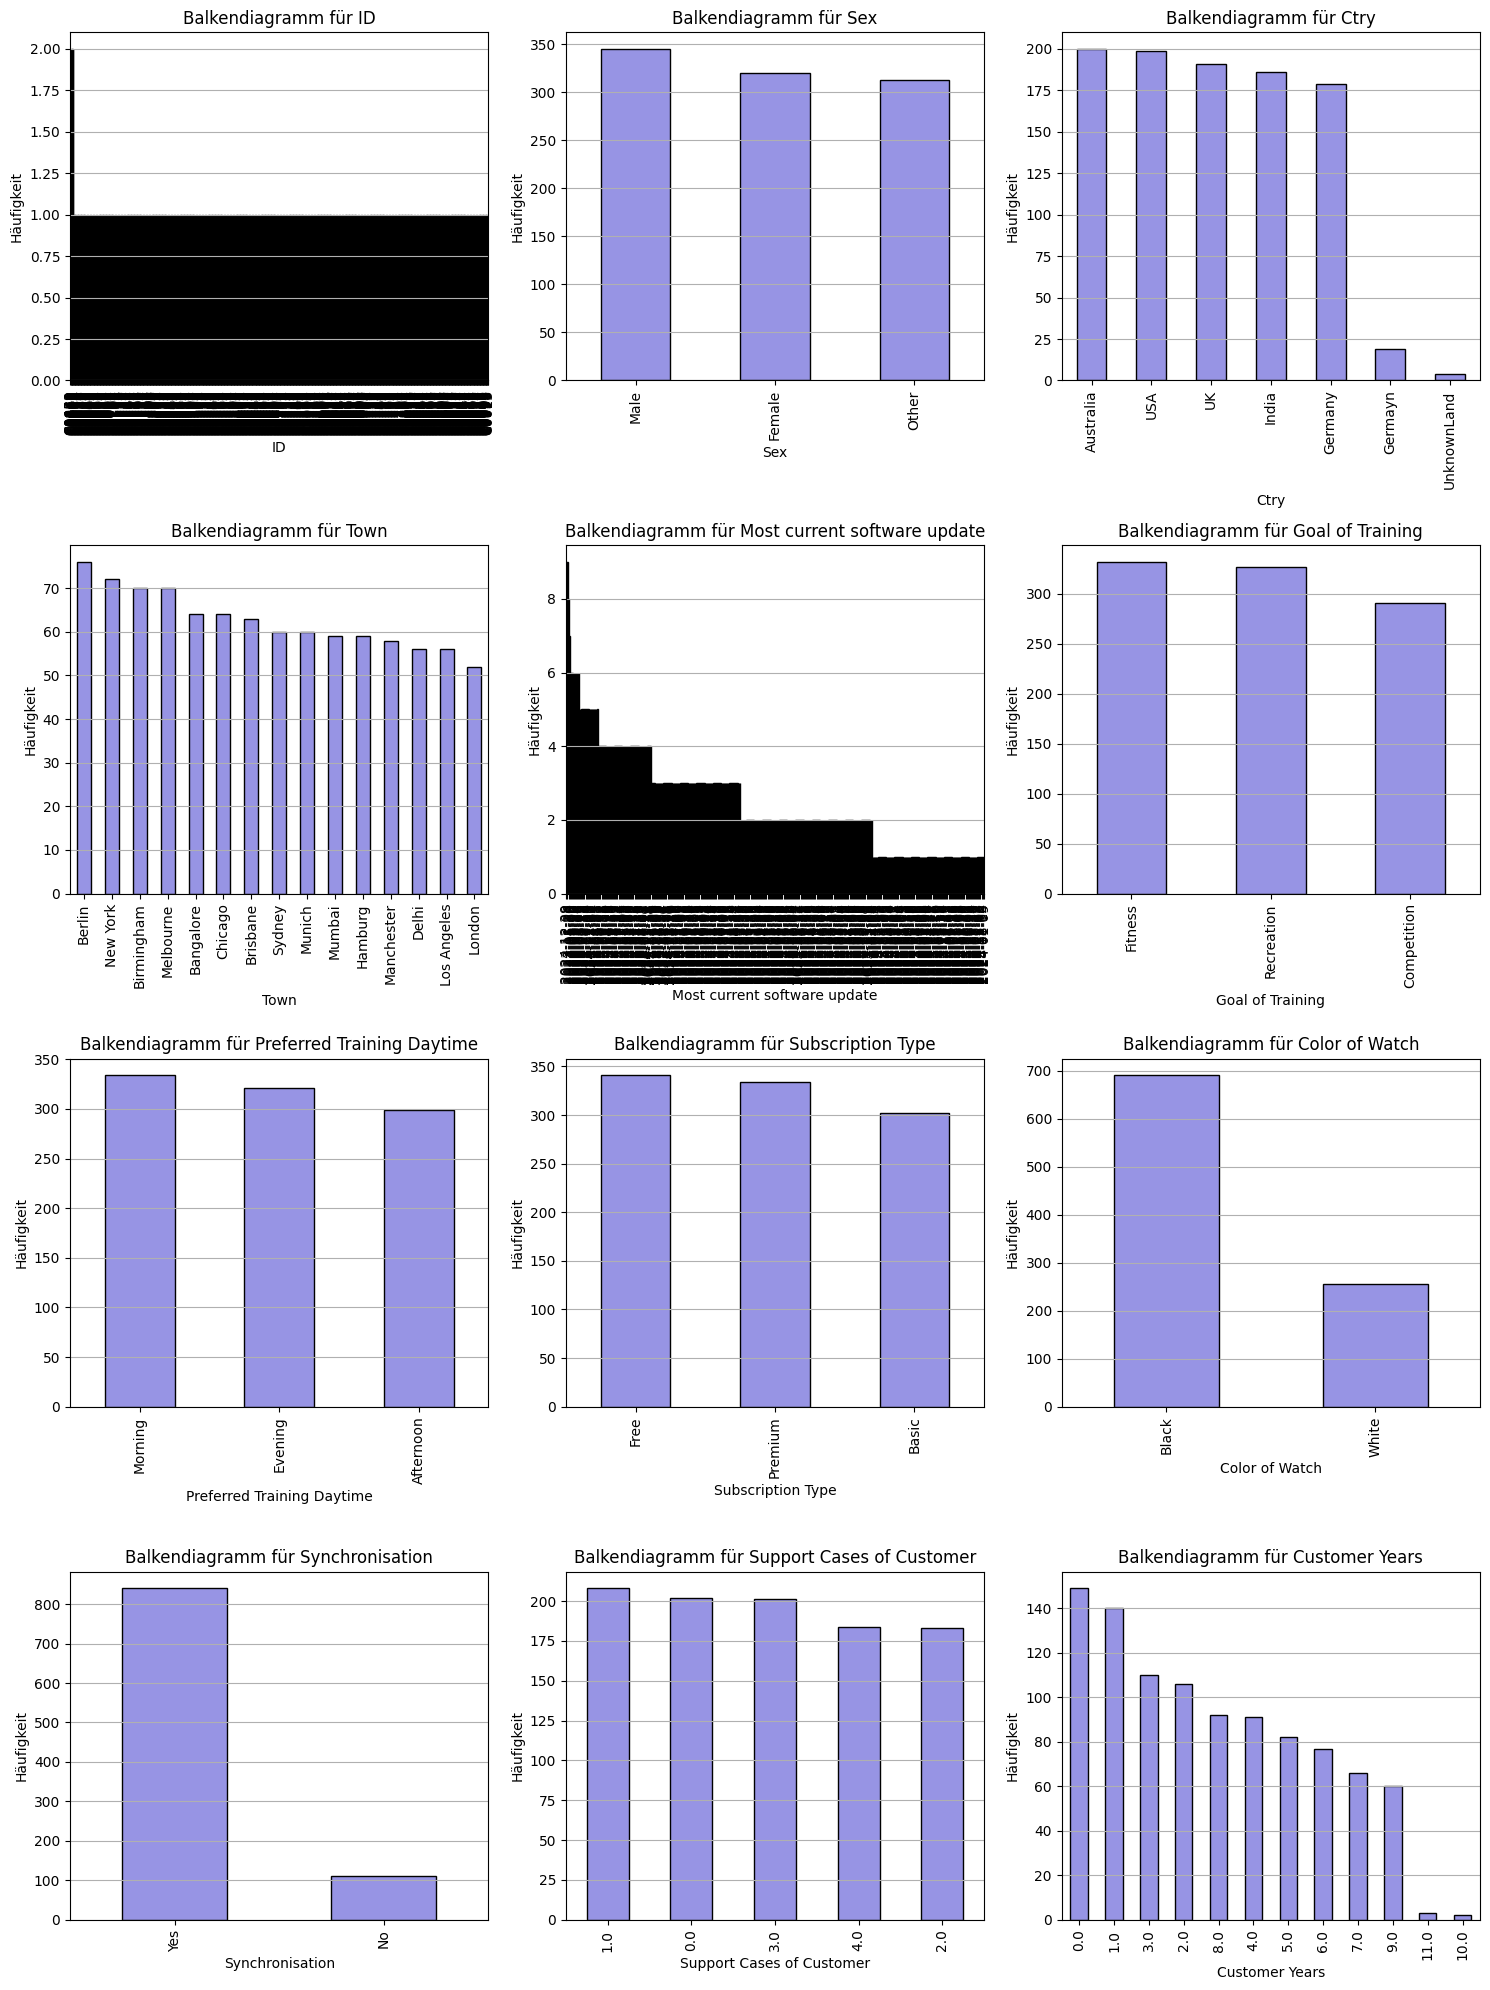

In [225]:
# Rastergröße festlegen (z.B. 2 Zeilen und so viele Spalten wie benötigt)
ncols = 3  # Anzahl der Spalten im Raster
nrows = (len(categorical_cols) // ncols) + (len(categorical_cols) % ncols > 0)  # Berechnet die notwendige Anzahl an Zeilen

# Subplots erstellen
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# Alle Achsen in einer Liste speichern, um sie zu iterieren
axes = axes.flatten()

# Durch jede kategorische Spalte iterieren und Balkendiagramme erstellen
for i, col in enumerate(categorical_cols):
    ax = axes[i]  # Der aktuelle Achsenbereich
    # Häufigkeiten der Kategorien berechnen
    value_counts = df_training[col].value_counts()
    # Balkendiagramm erstellen
    value_counts.plot(kind='bar', ax=ax, color=color1, edgecolor='black')
    ax.set_title(f"Balkendiagramm für {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Häufigkeit")
    ax.grid(axis='y')

# Überflüssige Subplots ausblenden (falls es mehr Plätze im Raster gibt als Spalten)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Plot anzeigen
plt.tight_layout()  # Layout anpassen
plt.show()

In [259]:
# # Subplot erstellen
# fig, axes = plt.subplots(len(categorical_cols), 1, figsize=(10, 5 * len(categorical_cols)))

# # Für jede kategorische Spalte
# for i, col in enumerate(categorical_cols):
#     # Häufigkeiten der Kategorien zählen
#     counts = df_training[col].value_counts(normalize=True).sort_index()
    
#     # Erstelle einen DataFrame, der für den Stacked Barplot geeignet ist
#     counts_df = counts.to_frame().transpose()

#     # Stacked Barplot erstellen
#     counts_df.plot(kind='bar', stacked=True, ax=axes[i], color=sns.color_palette("Set2", len(counts_df.columns)))
    
#     # Achsenbeschriftungen und Titel hinzufügen
#     axes[i].set_title(f"Verteilung der Kategorien in {col}")
#     axes[i].set_ylabel("Relative Häufigkeit")
#     axes[i].set_xlabel("Kategorien")

# # Layout anpassen, damit alles gut aussieht
# plt.tight_layout()
# plt.show()

**Erkenntnisse Verteilung kategorische Daten**  
- `ID`  
Zu viele Ausprägungen für die Visualisierung. Es scheint allerdings 7 IDs zu geben, die doppelt vorkommen. Das sollte eigentlich nicht der Fall sein und muss im Folgenden näher betrachtet werden.
- `Sex`  
Häufigste Kategorie ist männlich. Allgemein jedoch keine großen Unterschiede in den Häufigkeiten der Ausprägungen.
- `Ctry`  
Häufigste Kategorie ist Australien. Allgemein jedoch keine großen Unterschiede in den Häufigkeiten der Ausprägungen. Datenfehler *UnknownLand* und *Germayn* werden hier deutlich.
- `Town`  
Häufigste Kategorie ist Berlin. Allgemein jedoch keine großen Unterschiede in den Häufigkeiten der Ausprägungen.
- `Most current software update`  
Zu viele Ausprägungen für die Visualisierung. Eine Umformatierung zu datetime format wäre sinnig. Alternativ wäre auch mit Hilfe Feature Engineering das Datum in seine Bestandteile zu zerlegen.
- `Goal of Training`  
Häufigste Kategorie ist Fitness, Recreation jedoch auf ähnlichem Niveau. 
- `Preferred Training Daytime`  
Häufigste Kategorie ist morgens, gefolgt von abends. Nachmittags liegt mit etwas größerem Abstand dahinter.
- `Subscription Type`  
Häufigste Kategorie ist free, gefolgt von premium. Basic liegt mit etwas größerem Abstand dahinter.
- `Color of Watch`  
Deutliche Häufigkeit der Farbe Schwarz ggü. der zweiten Ausprägung weiß.
- `Synchronisation`  
Deutliche Häufigkeit der Synchronisation ggü. der zweiten Ausprägung nicht synchronisiert.
- `Support Cases of Customer`  
Die Anzahl 4 und 2 liegen mit etwas Abstand hinter 0, 1 oder 3.
- `Customer Years`  
Es gibt vermehrt Zeilen mit Kundenjahren zwischen 0 und 1 und kaum welche mit Kundenjahren über 10.

In [266]:
# Überprüfung Spalte ID
id_counts = df_training['ID'].value_counts()

pd.set_option('display.max_columns', None)

# Dann filtern, um nur die Zeilen mit IDs, die mehr als einmal vorkommen, zu behalten
df_training[df_training['ID'].isin(id_counts[id_counts > 1].index)]

,ID,Age of customer,Sex,Ctry,Town,Swimming Hours per Week,Biking Hours per Week,Running Hours per Week,Total Training Hours per Week,VO2 Max,10k Running Time Prediction,Calories Burned per Week,Support Cases of Customer,Customer Years,Most current software update,Goal of Training,Preferred Training Daytime,Subscription Type,Color of Watch,Synchronisation,User of latest model
59,C0059,63.0,Other,UK,London,0.00,5.00,2.80,7.80,20.49,63.31,3694.24,3.0,1.0,2024-08-26,Recreation,Morning,Free,Black,No,0.0
60,C0059,62.0,Other,UK,London,0.00,5.00,2.80,7.80,20.49,63.31,3694.24,3.0,1.0,2024-08-26,Recreation,Morning,Free,Black,No,0.0
479,C0482,61.0,Female,Australia,Melbourne,0.62,10.05,4.96,15.62,28.89,58.83,7664.95,1.0,1.0,2024-04-15,Competition,Afternoon,Basic,Black,Yes,1.0
480,C0482,62.0,Female,Australia,Melbourne,0.62,10.05,4.96,15.62,28.89,58.83,7664.95,1.0,1.0,2024-04-15,Competition,Afternoon,Basic,Black,Yes,1.0
568,C0568,32.0,Male,USA,New York,3.17,7.17,3.10,13.44,61.28,37.68,6919.41,4.0,7.0,2024-08-06,Fitness,Afternoon,Premium,Black,NaN,1.0
569,C0568,33.0,Male,USA,New York,3.17,7.17,3.10,13.44,61.28,37.68,6919.41,4.0,7.0,2024-08-06,Fitness,Afternoon,Premium,Black,NaN,1.0
641,C0640,29.0,Other,Australia,Melbourne,5.06,1.44,0.25,6.75,54.86,43.60,3233.52,0.0,3.0,2024-11-22,Fitness,Evening,Basic,Black,Yes,0.0
642,C0640,29.0,Other,Australia,Melbourne,5.06,1.44,0.25,6.75,54.86,43.60,3233.52,0.0,3.0,2024-11-22,Fitness,Evening,Basic,Black,Yes,0.0
644,C0641,52.0,Male,UK,Manchester,1.87,5.58,2.37,9.81,44.88,49.10,4785.35,3.0,0.0,2024-01-08,Recreation,Evening,Premium,Black,Yes,0.0
645,C0641,53.0,Male,UK,Manchester,1.87,5.58,2.37,9.81,44.88,49.10,4785.35,3.0,0.0,2024-01-08,Recreation,Evening,Premium,Black,Yes,0.0


Die Zeilen, bei denen die ID gleich ist unterscheiden sich sonst nur im Alter oder überhaupt nicht. Die Zeilen wirken wir Duplikate bzw. eine Doppelanmeldung des selben Kundens mit einem höheren Alter (Altersunterschied max 1 Jahr). Eine der Zeilen sollte jeweils gelöscht werden.

In [278]:
# Überprüfung sonstige mögliche Duplikate
find_similar_rows(df_training, max_diff=3).sort_values(by='ID')

,ID,Age of customer,Sex,Ctry,Town,Swimming Hours per Week,Biking Hours per Week,Running Hours per Week,Total Training Hours per Week,VO2 Max,10k Running Time Prediction,Calories Burned per Week,Support Cases of Customer,Customer Years,Most current software update,Goal of Training,Preferred Training Daytime,Subscription Type,Color of Watch,Synchronisation,User of latest model
59,C0059,63.0,Other,UK,London,0.00,5.00,2.80,7.80,20.49,63.31,3694.24,3.0,1.0,2024-08-26,Recreation,Morning,Free,Black,No,0.0
60,C0059,62.0,Other,UK,London,0.00,5.00,2.80,7.80,20.49,63.31,3694.24,3.0,1.0,2024-08-26,Recreation,Morning,Free,Black,No,0.0
480,C0482,62.0,Female,Australia,Melbourne,0.62,10.05,4.96,15.62,28.89,58.83,7664.95,1.0,1.0,2024-04-15,Competition,Afternoon,Basic,Black,Yes,1.0
479,C0482,61.0,Female,Australia,Melbourne,0.62,10.05,4.96,15.62,28.89,58.83,7664.95,1.0,1.0,2024-04-15,Competition,Afternoon,Basic,Black,Yes,1.0
568,C0568,32.0,Male,USA,New York,3.17,7.17,3.10,13.44,61.28,37.68,6919.41,4.0,7.0,2024-08-06,Fitness,Afternoon,Premium,Black,NaN,1.0
569,C0568,33.0,Male,USA,New York,3.17,7.17,3.10,13.44,61.28,37.68,6919.41,4.0,7.0,2024-08-06,Fitness,Afternoon,Premium,Black,NaN,1.0
641,C0640,29.0,Other,Australia,Melbourne,5.06,1.44,0.25,6.75,54.86,43.60,3233.52,0.0,3.0,2024-11-22,Fitness,Evening,Basic,Black,Yes,0.0
642,C0640,29.0,Other,Australia,Melbourne,5.06,1.44,0.25,6.75,54.86,43.60,3233.52,0.0,3.0,2024-11-22,Fitness,Evening,Basic,Black,Yes,0.0
644,C0641,52.0,Male,UK,Manchester,1.87,5.58,2.37,9.81,44.88,49.10,4785.35,3.0,0.0,2024-01-08,Recreation,Evening,Premium,Black,Yes,0.0
645,C0641,53.0,Male,UK,Manchester,1.87,5.58,2.37,9.81,44.88,49.10,4785.35,3.0,0.0,2024-01-08,Recreation,Evening,Premium,Black,Yes,0.0


Anhand der doppelten ID wurden die einzigen Duplikate entdeckt. Ansonsten unterscheiden sich die Zeilen in mindestens 3 Spalten im Dataframe.

In [ ]:
# Konvertierung 'Most current software update' in das Datetime-Format
df_training['Most current software update'] = pd.to_datetime(df_training['Most current software update'], errors='coerce')

In [281]:
df_training[categorical_cols].describe().T

,count,mean,min,25%,50%,75%,max,std
Most current software update,977,2024-05-25 23:54:06.264073728,2023-10-11 00:00:00,2024-02-07 00:00:00,2024-05-25 00:00:00,2024-09-13 00:00:00,2025-01-01 00:00:00,NaN
Support Cases of Customer,978.0,1.956033,0.0,1.0,2.0,3.0,4.0,1.413167
Customer Years,978.0,3.792434,0.0,1.0,3.0,6.0,11.0,2.916593


In [283]:
df_training['Most current software update'].sort_values().head(50)

163   2023-10-11
37    2023-10-12
243   2023-10-12
634   2023-10-12
827   2023-10-14
902   2023-10-14
892   2023-10-14
388   2023-10-15
426   2023-10-15
301   2023-10-18
198   2023-10-18
514   2023-10-18
652   2023-10-18
659   2023-10-19
923   2023-10-20
610   2023-10-21
114   2023-10-21
938   2023-10-21
421   2023-10-22
533   2023-10-23
106   2023-10-24
813   2023-10-24
650   2023-10-24
189   2023-10-25
819   2023-10-25
353   2023-10-25
691   2023-10-26
837   2023-10-26
580   2023-10-27
44    2023-10-27
463   2023-10-28
151   2023-10-29
288   2023-10-29
333   2023-10-29
551   2023-10-30
459   2023-10-31
119   2023-10-31
921   2023-11-01
682   2023-11-02
276   2023-11-02
354   2023-11-03
550   2023-11-03
887   2023-11-03
431   2023-11-05
859   2023-11-05
611   2023-11-05
662   2023-11-06
179   2023-11-06
854   2023-11-06
778   2023-11-06
Name: Most current software update, dtype: datetime64[ns]

In [284]:
# Extrahiere Jahr, Monat und Wochentag
df_training['Year'] = df_training['Most current software update'].dt.year
df_training['Month'] = df_training['Most current software update'].dt.month
df_training['Weekday'] = df_training['Most current software update'].dt.weekday  # 0=Montag, 1=Dienstag, ...

df_training[['Most current software update', 'Year', 'Month', 'Weekday']].head()


,Most current software update,Year,Month,Weekday
0,2024-07-22,2024.0,7.0,0.0
1,2024-05-11,2024.0,5.0,5.0
2,2024-08-16,2024.0,8.0,4.0
3,2024-08-11,2024.0,8.0,6.0
4,2024-11-18,2024.0,11.0,0.0


In [286]:
new_categorical_cols = ['Year', 'Month', 'Weekday']

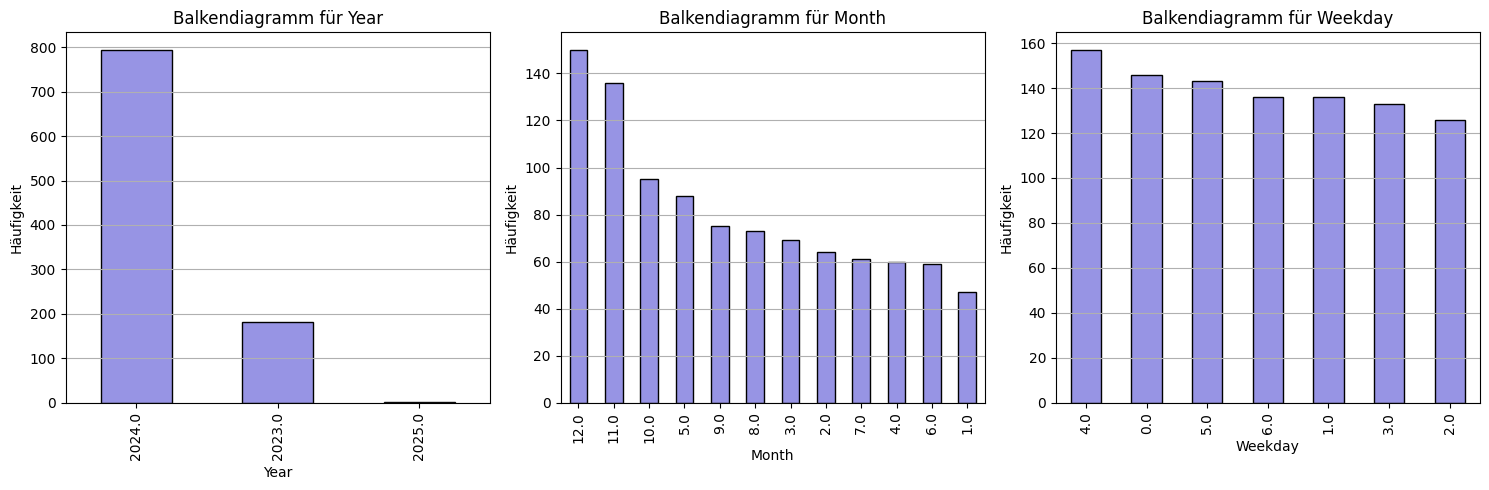

In [287]:
# Rastergröße festlegen (z.B. 2 Zeilen und so viele Spalten wie benötigt)
ncols = 3  # Anzahl der Spalten im Raster
nrows = (len(new_categorical_cols) // ncols) + (len(new_categorical_cols) % ncols > 0)  # Berechnet die notwendige Anzahl an Zeilen

# Subplots erstellen
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# Alle Achsen in einer Liste speichern, um sie zu iterieren
axes = axes.flatten()

# Durch jede kategorische Spalte iterieren und Balkendiagramme erstellen
for i, col in enumerate(new_categorical_cols):
    ax = axes[i]  # Der aktuelle Achsenbereich
    # Häufigkeiten der Kategorien berechnen
    value_counts = df_training[col].value_counts()
    # Balkendiagramm erstellen
    value_counts.plot(kind='bar', ax=ax, color=color1, edgecolor='black')
    ax.set_title(f"Balkendiagramm für {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Häufigkeit")
    ax.grid(axis='y')

# Überflüssige Subplots ausblenden (falls es mehr Plätze im Raster gibt als Spalten)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Plot anzeigen
plt.tight_layout()  # Layout anpassen
plt.show()

Da der Datensatz erst Oktober 2023 beginnt und am 01.01.2025 endet, ist es nur logisch, dass 2024 die höchsten Werte beinhaltet. Ebenso gilt dies für die Monate Oktober bis Dezember. Die kommen einmal für 2023 und für 2024 vor und haben so eine größere Chance aufzutauchen.  
Fachlich gesehen, ist es nicht sinnig nach Saisonalitäten zu schauen, sondern eher nach der Frage zu gehen "Wie aktuell halten die Kunden das Update". Insofern wäre eine stetige Variable mit dem Max-Wert - tatsächlichen Wert sinnvoller, um zu sehen, ob ein Zusammenhang darin besteht "Je älter das letzte Update, desto weniger wahrscheinlich ist der Kauf des neuen Modells".

In [289]:
max_date = df_training['Most current software update'].max()
df_training['Days since Update'] = (max_date - df_training['Most current software update']).dt.days
df_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ID                             978 non-null    object        
 1   Age of customer                978 non-null    float64       
 2   Sex                            978 non-null    object        
 3   Ctry                           978 non-null    object        
 4   Town                           939 non-null    object        
 5   Swimming Hours per Week        978 non-null    float64       
 6   Biking Hours per Week          954 non-null    float64       
 7   Running Hours per Week         978 non-null    float64       
 8   Total Training Hours per Week  978 non-null    float64       
 9   VO2 Max                        975 non-null    float64       
 10  10k Running Time Prediction    978 non-null    float64       
 11  Calories Burned pe

##### Einblick in neue numerische Spalte Days since Update  

In [290]:
df_training['Days since Update'].describe()

count    977.000000
mean     220.004094
std      128.873365
min        0.000000
25%      110.000000
50%      221.000000
75%      329.000000
max      448.000000
Name: Days since Update, dtype: float64

<Axes: >

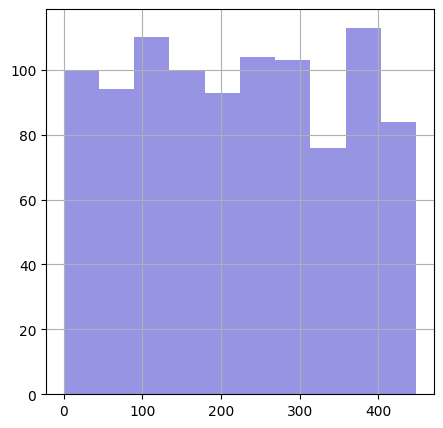

In [292]:
df_training['Days since Update'].hist(figsize=(5,5), color= hex_to_rgb_normalized(color1))

<Axes: >

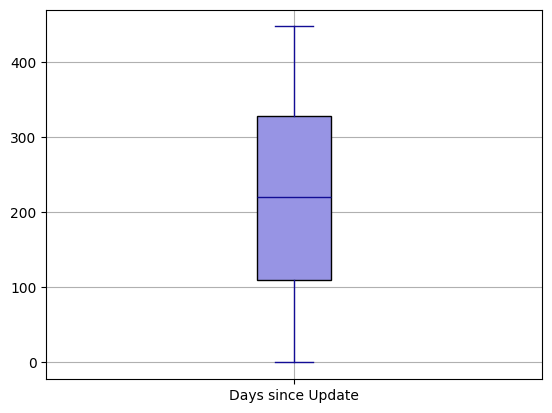

In [294]:
df_training.boxplot(column='Days since Update', patch_artist=True, 
                        boxprops=dict(facecolor=color1, color='black'), 
                        whiskerprops=dict(color=color2),
                        flierprops=dict(markerfacecolor=color3, marker='o', markersize=7),
                        capprops=dict(color=color2),
                        medianprops=dict(color=color2))

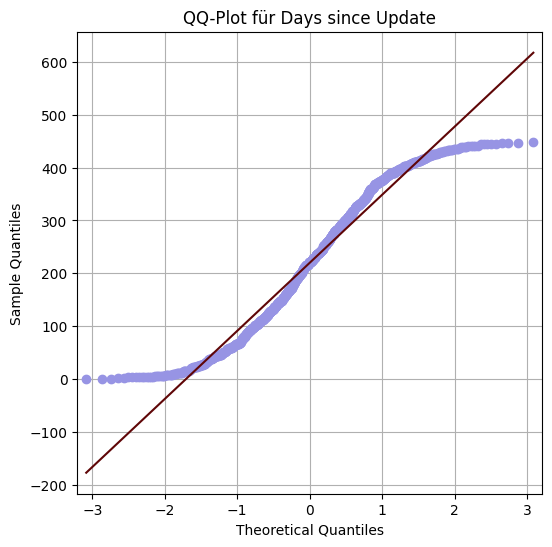

In [298]:
# Erstelle ein Plot-Objekt und eine Achse
fig, ax = plt.subplots(figsize=(6, 6))

 # QQ-Plot erstellen, aber diesmal speichern wir das Objekt (der Plot wird hier erstellt)
qq = qqplot(df_training['Days since Update'].dropna(), line='s', ax=ax)

# Extrahiere die Linienobjekte
lines = ax.get_lines()

# Setze die Farbe der Linie (die theoretische Normalverteilungslinie)
lines[1].set_color(color3)  # Die zweite Linie ist die 'line=s' Linie

# Setze die Farbe der Datenpunkte (erste Linie ist der Scatterplot)
lines[0].set_markerfacecolor(color1)
lines[0].set_markeredgecolor(color1)

# Achsentitel und Gitter
ax.set_title(f"QQ-Plot für Days since Update")
ax.grid(True)

plt.show()

In [305]:
# Schiefe
skewness = df_training['Days since Update'].skew()

skewness_df = pd.DataFrame({
    'Spalte': ['Days since Update'],
    'Schiefe': [skewness],
    'Kategorie': [categorize_skewness(skewness)]
})

skewness_df

,Spalte,Schiefe,Kategorie
0,Days since Update,0.023679,eher symmetrisch


In [306]:
print(f'\nShapiro-Wilk Test für Spalte: Days since Update')
shapiro_wilk_test(df_training['Days since Update'].dropna(), 0.05)
print('-' * 40)


Shapiro-Wilk Test für Spalte: Days since Update
Statistics=0.956, p=0.00000
Sample does not look Gaussian (reject H0)
----------------------------------------


Die neue Spalte zeigt am ehesten eine symmetrische Gleichverteilung. Bei Nutzung der Spalte müsste eine Transformation erfolgen.

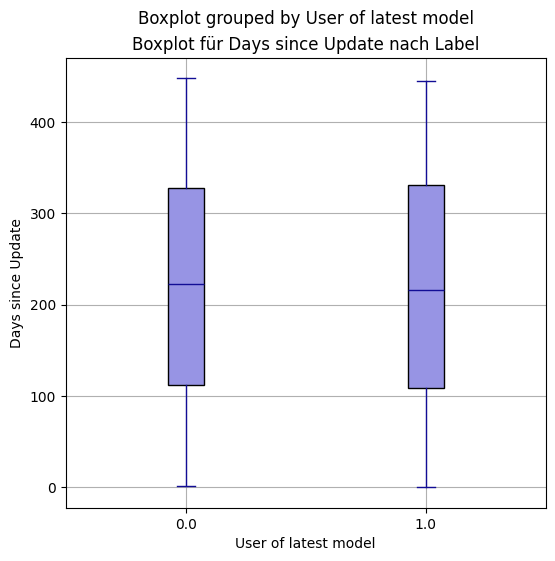

In [307]:
# Subplots erstellen
fig, ax = plt.subplots(figsize=(6, 6))

# Boxplot für die Zielspalte auf der x-Achse (label)
df_training.boxplot(column='Days since Update', by=label, ax=ax, patch_artist=True,
                    boxprops=dict(facecolor=color1, color='black'),  # Farbe für Kategorie 0
                    whiskerprops=dict(color=color2),
                    flierprops=dict(markerfacecolor=color3, marker='o', markersize=7),
                    capprops=dict(color=color2),
                    medianprops=dict(color=color2))

# Titel und Achsenbeschriftung anpassen
ax.set_title(f"Boxplot für Days since Update nach Label")
ax.set_xlabel(label)
ax.set_ylabel('Days since Update')
ax.grid(True)


<Axes: >

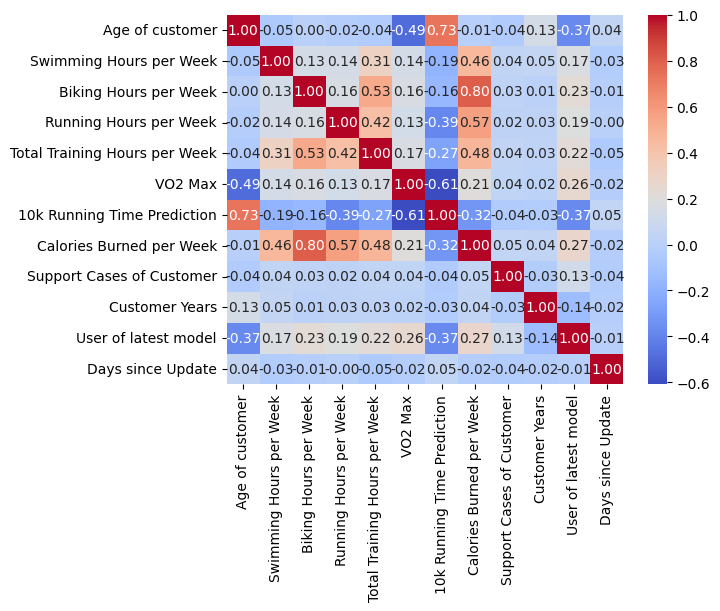

In [314]:
corr = df_training[numerical_cols.tolist() + ['Days since Update']].corr()
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f")

In [315]:
feature_name = 'Days since Update'

data_anova = pd.concat([df_training[feature_name], df_training[label]], axis=1)
data_anova = data_anova.dropna()

for category in data_anova[label].unique():
    groups.append(data_anova[data_anova[label] == category][feature_name])

stat, p = f_oneway(*groups)
print(f'P-Wert für {feature_name} und {label}: {p}')

P-Wert für Days since Update und User of latest model: 0.0


Das neue Feature scheint nicht wirklich einen Zusammenhang zu anderen numerischen Variablen aufzuweisen. Grafisch konnte auch kein Unterschied in der Verteilung der Daten je nach Label-Ausprägung erkannt werden. Laut ANOVA-Test hat das neue Feature jedoch einen Einfluss auf das Label.

#### Einblick Zusammenhänge

In [341]:
categorical_cols = [item for item in categorical_cols if item not in ['Most current software update', 'ID']]
categorical_cols

['Sex',
 'Ctry',
 'Town',
 'Goal of Training',
 'Preferred Training Daytime',
 'Subscription Type',
 'Color of Watch',
 'Synchronisation',
 'Support Cases of Customer',
 'Customer Years']

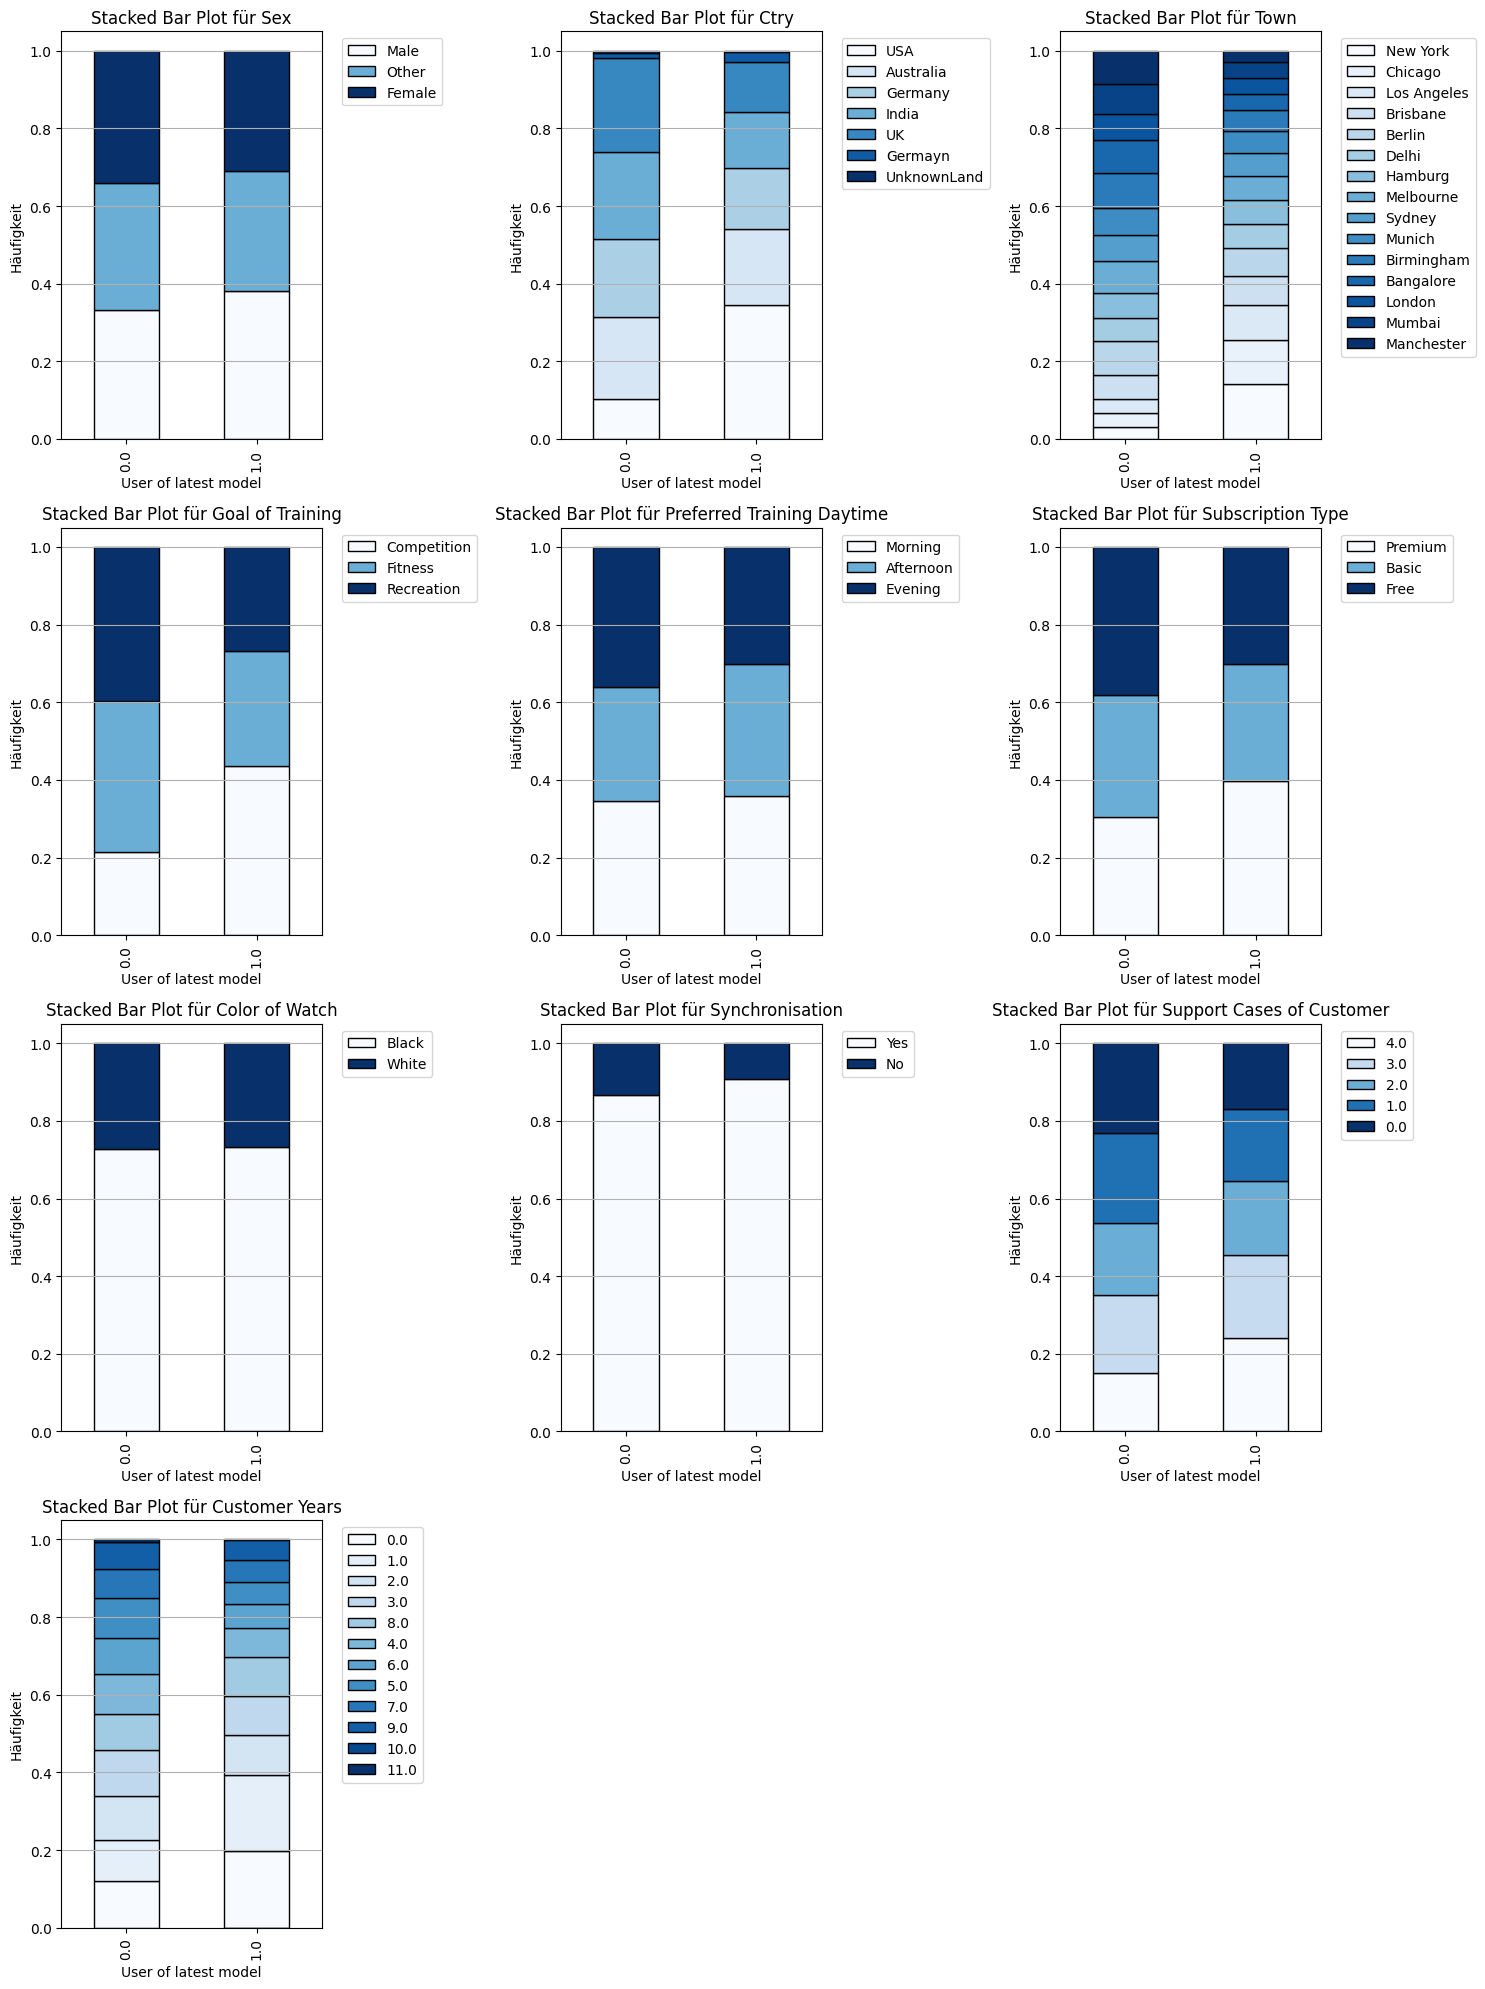

In [337]:
# Rastergröße festlegen (z.B. 2 Zeilen und so viele Spalten wie benötigt)
ncols = 3  # Anzahl der Spalten im Raster
nrows = (len(categorical_cols) // ncols) + (len(categorical_cols) % ncols > 0)  # Berechnet die notwendige Anzahl an Zeilen

# Subplots erstellen
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# Alle Achsen in einer Liste speichern, um sie zu iterieren
axes = axes.flatten()

# Iteriere über jede kategorische Spalte
for i, col in enumerate(categorical_cols):
    ax = axes[i]  # Der aktuelle Achsenbereich
    
    # Gruppiere nach der Zielspalte und zähle die Häufigkeit jeder Kategorie
    grouped = df_training.groupby([label, col]).size().unstack(fill_value=0)

    # Berechne die Anteile der Kategorien für label = 1 (Zielspalte ist 1)
    proportions_label_1 = grouped.loc[1].div(grouped.loc[1].sum())

    # Sortiere die Kategorien nach den Anteilen von label = 1 in absteigender Reihenfolge
    sorted_columns = proportions_label_1.sort_values(ascending=False).index

    # Reorganisiere die gruppierten Daten basierend auf der sortierten Reihenfolge
    grouped_sorted = grouped[sorted_columns]

    # Normalisierte Gruppen berechnen
    normalized_grouped = grouped_sorted.div(grouped_sorted.sum(axis=1), axis=0)

    # Stacked Bar Plot erstellen
    normalized_grouped.plot(kind='bar', stacked=True, ax=ax, colormap='Blues', edgecolor='black')

    # Achsentitel und Labels
    ax.set_title(f"Stacked Bar Plot für {col}")
    ax.set_xlabel(label)
    ax.set_ylabel('Häufigkeit')
    ax.grid(axis='y')

    # Legende nach rechts verschieben
    ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))  # Verschiebe die Legende nach rechts

# Überflüssige Subplots ausblenden (falls es mehr Plätze im Raster gibt als Spalten)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Layout anpassen und Plot anzeigen
plt.tight_layout()
plt.show()


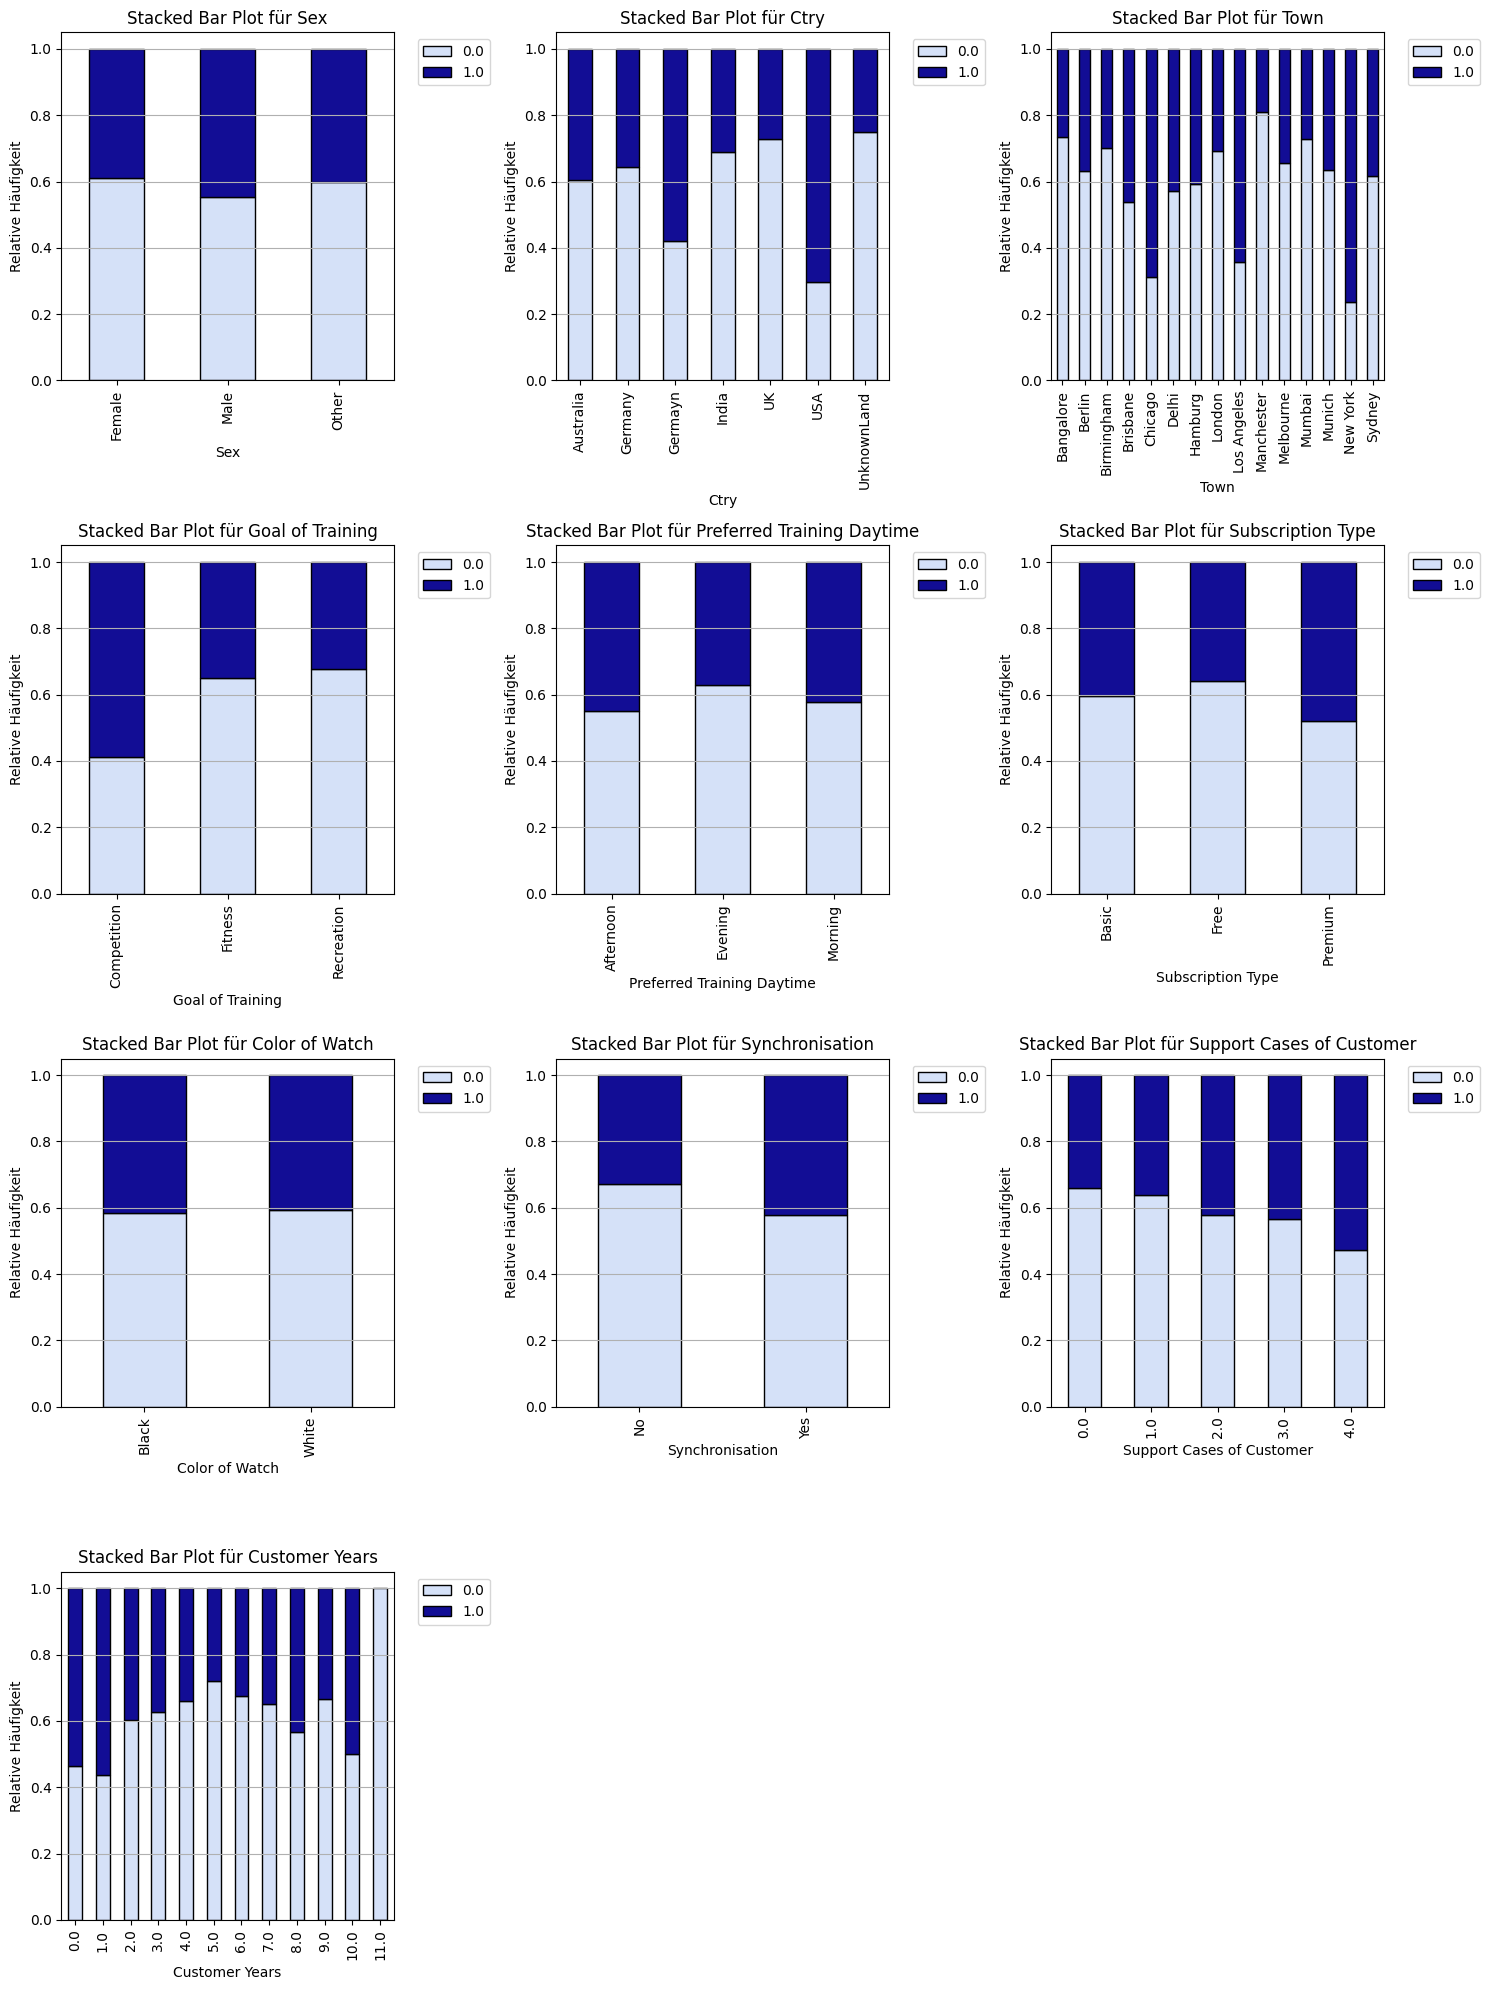

In [354]:
# Rastergröße festlegen (z.B. 2 Zeilen und so viele Spalten wie benötigt)
ncols = 3  # Anzahl der Spalten im Raster
nrows = (len(categorical_cols) // ncols) + (len(categorical_cols) % ncols > 0)  # Berechnet die notwendige Anzahl an Zeilen

# Subplots erstellen
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# Alle Achsen in einer Liste speichern, um sie zu iterieren
axes = axes.flatten()

# Iteriere über jede kategorische Spalte
for i, col in enumerate(categorical_cols):
    ax = axes[i]  # Der aktuelle Achsenbereich
    
    # Gruppiere nach dem Label und berechne die Häufigkeit der Kategorien
    data = pd.crosstab(df_training[col], df_training[label])
    
    # Normalisiere die Daten, sodass sie die relativen Häufigkeiten darstellen
    data = data.div(data.sum(axis=1), axis=0)
    
    # Stacked Bar Plot erstellen
    data.plot(kind='bar', stacked=True, ax=ax, edgecolor='black', color=[color5, color2]) 


    # Achsentitel und Labels
    ax.set_title(f"Stacked Bar Plot für {col}")
    ax.set_xlabel(col)
    ax.set_ylabel('Relative Häufigkeit')
    ax.grid(axis='y')

    # Legende nach rechts verschieben
    ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))  # Verschiebe die Legende nach rechts

# Überflüssige Subplots ausblenden (falls es mehr Plätze im Raster gibt als Spalten)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Layout anpassen und Plot anzeigen
plt.tight_layout()
plt.show()


**Erkenntisse grafische Darstellung**
- `Sex`, `Preferred Training Daytime`, `Color of Watch`   
Kaum Unterschiede in den Anteiligkeiten je nach Label erkennbar
- `Ctry`, `Town`,  `Goal of Training`, `Subscription Type`, `Support Cases of Customer`, `Customer Years`, `Synchronisation`  
Unterschiede in den Anteiligkeiten je nach Label erkennbar

In [355]:
features_non_continous = df_training[categorical_cols]
non_continous_df = pd.concat([features_non_continous,df_training[label]],axis=1)

In [346]:
non_cont_columns = non_continous_df.columns

#create a new dataframe which contains chi2 values for all feature combinations
chi2_values = pd.DataFrame(index=non_cont_columns, columns=non_cont_columns)
for i in non_cont_columns:
    for j in non_cont_columns:
        df_chi2 = non_continous_df[[i,j]]
        data_cont=pd.crosstab(df_chi2.iloc[:,0], df_chi2.iloc[:,1])
        stat, p, dof, expected = chi2_contingency(data_cont)
        chi2_values.loc[i,j] = p

<Axes: >

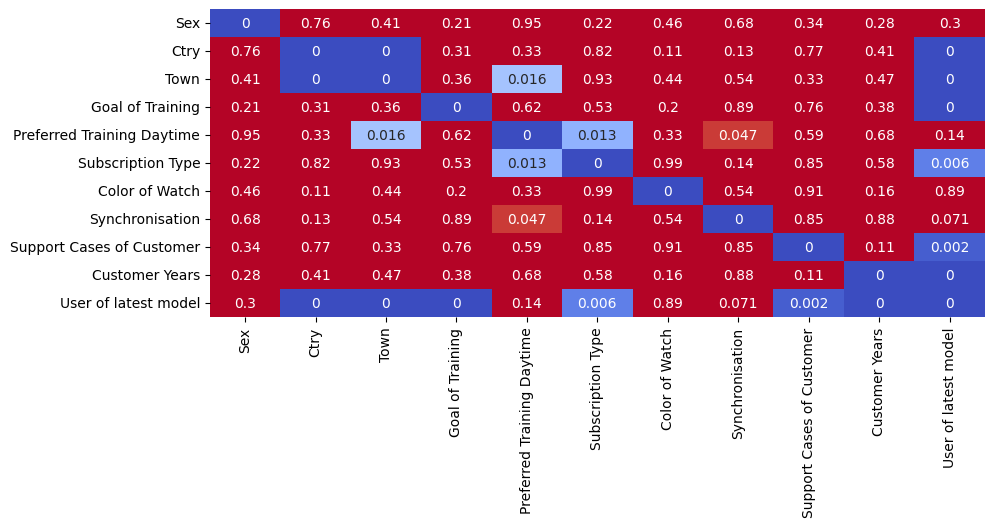

In [349]:
plt.figure(figsize=(10,4))
sns.heatmap(round(chi2_values.astype(float),3), annot=True, cmap='coolwarm', cbar=False, vmin=0, vmax=0.05)

**Erkenntisse Chi2-Test**
- `Sex`, `Preferred Training Daytime`, `Color of Watch`, `Synchronisation`  
Keinen Einfluss auf Label
- `Ctry`, `Town`,  `Goal of Training`, `Subscription Type`, `Support Cases of Customer`, `Customer Years`  
Einfluss auf Label

### Zusammenfassung

**Traningsdaten**
1. Löschen der 22 Zeilen, in denen das Label 0 ist.
2. Löschen der 7 Zeilen mit der doppelten ID.
3. Umbennung Germayn zu Germany in Spalte `Ctry` 
4. Anpassung UnknownLand in Spalte `Ctry`
5. Berechnung der fehlenden Werte für `Biking Hours per Week` durch `Total Training Hours per Week` - `Swimming Hours per Week` -  `Running Hours per Week` (Aureißer bei der Gesamttrainingszeit betreffen hier nicht die fehlenden Wert für Biking Hours)
6. Unplausible Werte für `Total Training Hours per Week` durch andere Spalten berechnen lassen und ersetzen.
7. Setzen der unplausiblen Werte von `VO2 Max` und `Age of Customer` auf NaN.
8. Imputation bei `Calories Burned per Week` durch Regression mit Hilfe von `Biking Hours per Week`
9. Imputation bei `VO2 Max` durch Regression mit Hilfe von `10k Running Time Prediction`